# 1)Ohe with PCA

In [ ]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 14.0 MB/s 
     |████████████████████████████████| 9.9 MB 70.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
#importing libraries
import seaborn as sns
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

In [ ]:
import pandas as pd
df_train_label=pd.read_csv('/content/drive/MyDrive/self case study 1/train labels.csv')
df_train_var=pd.read_csv('/content/drive/MyDrive/self case study 1/train variables.csv')
df=df_train_var.merge(df_train_label)

In [ ]:
df_test=pd.read_csv('/content/702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv')
df_test.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


preprocess on text data

In [ ]:
# Combining all the above stundents 
from tqdm import tqdm
def preprocess_text(df,col):
    preprocessed_text = []
    # tqdm is for printing the status bar
    df[col] = df[col] .str.replace('/', ' ')
    df[col] = df[col].str.lower()
    df[col] = df[col].str.replace(',','')
    df[col] = df[col].str.replace('.','')
    return df[col] 

In [ ]:
  #df_test.population=df.population.replace(0,df_test.population.mean())
  #https://stackoverflow.com/questions/17097236/replace-invalid-values-with-none-in-pandas-dataframe
  df_test.gps_height=df.gps_height.where(df.gps_height< 0, df.gps_height.mean())
  df_test.population=df.population.replace(0,df.population.mean())
  #df['funder']=df['funder'].replace(np.nan,df['funder'].mode)
  df_test['funder'] = df_test['funder'].fillna('unknown')
  df_test['installer']=df_test['installer'].fillna('unknown')
  df_test['subvillage']=df_test['subvillage'].fillna('unknown')
  df_test['public_meeting']=df_test['public_meeting'].fillna('unknown')
  df_test['scheme_management']=df_test['scheme_management'].fillna('unknown')
  df_test.amount_tsh=df.amount_tsh.replace(0,df.amount_tsh.median())


In [ ]:
df.gps_height=df.gps_height.where(df.gps_height< 0, df.gps_height.mean())
df.population=df.population.replace(0,df.population.mean())
#df['funder']=df['funder'].replace(np.nan,df['funder'].mode.values[0])
df['funder'] = df['funder'].fillna('unknown')
df['installer']=df['installer'].fillna('unknown')
df['subvillage']=df['subvillage'].fillna('unknown')
df['public_meeting']=df['public_meeting'].fillna('unknown')
df['scheme_management']=df['scheme_management'].fillna('unknown')
df.amount_tsh=df.amount_tsh.replace(0,df.amount_tsh.median())

In [ ]:
df['region'] = preprocess_text(df,'region')
df['lga']=preprocess_text(df,'lga')
df['ward']=preprocess_text(df,'ward')
df['public_meeting']=preprocess_text(df,'public_meeting')
df['recorded_by']=preprocess_text(df,'recorded_by')

df['scheme_name']=preprocess_text(df,'scheme_name')
#df_mlm['permit']=preprocess_text(df_mlm,'permit')
df_test['extraction_type']=preprocess_text(df,'extraction_type')

df['extraction_type_group']=preprocess_text(df,'extraction_type_group')
df['extraction_type_class']=preprocess_text(df,'extraction_type_class')
df['management']=preprocess_text(df_test,'management')

df['management_group']=preprocess_text(df,'management_group')
df['water_quality']=preprocess_text(df,'water_quality')
df['quality_group']=preprocess_text(df_test,'quality_group')

df['funder'] = preprocess_text(df,'funder')
df['installer']=preprocess_text(df,'installer')
df['subvillage']=preprocess_text(df,'subvillage')
df['public_meeting']=preprocess_text(df,'public_meeting')
df['scheme_management']=preprocess_text(df,'scheme_management')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  if __name__ == '__main__':


In [ ]:
df_test['region'] = preprocess_text(df_test,'region')
df_test['lga']=preprocess_text(df_test,'lga')
df_test['ward']=preprocess_text(df_test,'ward')
df_test['public_meeting']=preprocess_text(df_test,'public_meeting')
df_test['recorded_by']=preprocess_text(df_test,'recorded_by')

df_test['scheme_name']=preprocess_text(df_test,'scheme_name')
#df_mlm['permit']=preprocess_text(df_mlm,'permit')
df_test['extraction_type']=preprocess_text(df_test,'extraction_type')

df_test['extraction_type_group']=preprocess_text(df_test,'extraction_type_group')
df_test['extraction_type_class']=preprocess_text(df_test,'extraction_type_class')
df_test['management']=preprocess_text(df_test,'management')

df_test['management_group']=preprocess_text(df_test,'management_group')
df_test['water_quality']=preprocess_text(df_test,'water_quality')
df_test['quality_group']=preprocess_text(df_test,'quality_group')

df_test['funder'] = preprocess_text(df_test,'funder')
df_test['installer']=preprocess_text(df_test,'installer')
df_test['subvillage']=preprocess_text(df_test,'subvillage')
df_test['public_meeting']=preprocess_text(df_test,'public_meeting')
df_test['scheme_management']=preprocess_text(df_test,'scheme_management')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  if __name__ == '__main__':


In [ ]:
#https://towardsdatascience.com/how-to-select-the-best-number-of-principal-components-for-the-dataset-287e64b14c6d
#https://www.datasklr.com/principal-component-analysis-and-factor-analysis/principal-component-analysis********************
#https://towardsdatascience.com/feature-extraction-using-principal-component-analysis-a-simplified-visual-demo-e5592ced100a
#https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
#https://sanchitamangale12.medium.com/scree-plot-733ed72c8608

from warnings import simplefilter

# ignore all warnings
simplefilter(action='ignore')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

df.gps_height=df.gps_height.where(df.gps_height< 0, df.gps_height.mean())
df.population=df.population.replace(0,df.population.mean())
df.amount_tsh=df.amount_tsh.replace(0,df.amount_tsh.median())

df_new=df[['amount_tsh','gps_height','longitude','latitude','region_code','district_code','population']]
df_new.gps_height = preprocessing.MinMaxScaler().fit_transform(df_new.gps_height.values.reshape(-1,1))#standardize the values of differntmetrics in [0,1]



df_new.amount_tsh = preprocessing.MinMaxScaler().fit_transform(df_new.amount_tsh.values.reshape(-1,1))

df_new.longitude = preprocessing.MinMaxScaler().fit_transform(df_new.longitude.values.reshape(-1,1))

df_new.latitude = preprocessing.MinMaxScaler().fit_transform(df_new.latitude.values.reshape(-1,1))



df_new.region_code = preprocessing.MinMaxScaler().fit_transform(df_new.region_code.values.reshape(-1,1))
 
df_new.district_code = preprocessing.MinMaxScaler().fit_transform(df_new.district_code.values.reshape(-1,1))


df_new.population = preprocessing.MinMaxScaler().fit_transform(df_new.population.values.reshape(-1,1))

df["construction_year"]= pd.to_datetime(df['construction_year'])
df["date_recorded"]= pd.to_datetime(df['date_recorded'])

from datetime import datetime


duration =   df["date_recorded"]-df["construction_year"]                      # For build-in functions
df_new.duration=duration.astype('timedelta64[D]')
df_new.duration=np.array(df_new.duration).reshape(-1,1)

pca=PCA(n_components=3)

pca.fit(df_new)
x_pca=pca.transform(df_new)
x_pca.shape

df_pca = pd.DataFrame(x_pca[:,0:3], columns=['pc1','pc2','pc3'])
print (df_pca)
df_PCA=df.join(df_pca)

            pc1       pc2       pc3
0      0.302471 -0.149342 -0.113304
1     -0.259083  0.098687  0.090645
2     -0.103197  0.061709  0.091916
3      0.783911  0.764083 -0.121022
4     -0.320848  0.104100  0.038571
...         ...       ...       ...
59395 -0.197631 -0.065316  0.121339
59396  0.243865 -0.137214 -0.086271
59397  0.219055 -0.098075 -0.097400
59398  0.018147 -0.156668  0.010780
59399  0.071531 -0.155917  0.034078

[59400 rows x 3 columns]


In [ ]:
df=df_PCA

form a new feature by combining longitude and latitude into one feature called harvesine_distance

In [ ]:
from math import radians, cos, sin, asin, sqrt
from sklearn import preprocessing
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#https://datascience.stackexchange.com/questions/49553/combining-latitude-longitude-position-into-single-feature?rq=1

def single_pt_haversine(lat, lng, degrees=True):
    """
    'Single-point' Haversine: Calculates the great circle distance
    between a point on Earth and the (0, 0) lat-long coordinate
    """
    r = 6371 # Earth's radius (km). Have r = 3956 if you want miles

    # Convert decimal degrees to radians
    if degrees:
        lat, lng = map(radians, [lat, lng])

    # 'Single-point' Haversine formula
    a = sin(lat/2)**2 + cos(lat) * sin(lng/2)**2
    d = 2 * r * asin(sqrt(a)) 

    return d

df['harvesine_distance'] = [single_pt_haversine(x, y) for x, y in zip(df.latitude, df.longitude)]
df_test['harvesine_distance'] = [single_pt_haversine(x, y) for x, y in zip(df_test.latitude, df_test.longitude)]


In [ ]:
df_PCA[['pc1','pc2','pc3']].values

array([[ 0.30247106, -0.1493417 , -0.11330429],
       [-0.25908346,  0.0986871 ,  0.09064524],
       [-0.10319667,  0.06170918,  0.09191577],
       ...,
       [ 0.21905461, -0.09807533, -0.09739953],
       [ 0.01814714, -0.15666789,  0.01078009],
       [ 0.07153131, -0.15591687,  0.03407794]])

Replace nan values with unknown,mean,median

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
def prepare_data(df,df_test):
  #df=df.dropna()
  #df.gps_height=df.gps_height.replace(0,df.gps_height.median())
  df.gps_height=df.gps_height.where(df.gps_height< 0, df.gps_height.mean())
  df.population=df.population.replace(0,df.population.mean())
  #df['funder']=df['funder'].replace(np.nan,df['funder'].mode.values[0])
  df['funder'] = df['funder'].fillna('unknown')
  df['installer']=df['installer'].fillna('unknown')
  df['subvillage']=df['subvillage'].fillna('unknown')
  df['public_meeting']=df['public_meeting'].fillna('unknown')
  df['scheme_management']=df['scheme_management'].fillna('unknown')
  df.amount_tsh=df.amount_tsh.replace(0,df.amount_tsh.median())
  X=df.drop(['status_group'],axis=1)
  y=df.status_group
  from sklearn.model_selection import train_test_split
  #split the data into train test by using stratified sampling technique
  X_train, X_cv, y_train, y_cv= train_test_split(X, y,stratify=y,test_size=0.10,random_state=42)
  #X_train, X_test, y_train= X,df_test,y
  X_test=df_test
  from sklearn import preprocessing
  le = preprocessing.LabelEncoder()
  le=le.fit(df.status_group)
  #list(le.classes_)
  y_train=le.transform(y_train)
  y_cv=le.transform(y_cv)
  

  # We are considering only the words which appeared in at least 5 documents(rows or projects)
  #below code shows vectorization through one hot encoding
  def dummy_enc(df,feature):
    #df[feature] = df[feature].fillna("Unknown")
    vectorizer = CountVectorizer(min_df=5)
    train = vectorizer.fit_transform(X_train[feature])
    test = vectorizer.transform(X_test[feature])
    cv=  vectorizer.transform(X_cv[feature])
    return train,test,cv
  
  #X_train['funder'] = X_train['funder'].fillna("Unknown")
  #X_test['funder'] = X_test['funder'].fillna("Unknown")
  funder_ohe_train,funder_ohe_test,funder_ohe_cv=dummy_enc(X_train,'funder')
 
  #X_train['installer'],X_test['installer'] = X_train['installer'].fillna("Unknown"),X_test['installer'].fillna("Unknown")
  installer_ohe_train,installer_ohe_test,installer_ohe_cv=dummy_enc(X_train,'installer')
  
  #
  wpt_name_ohe_train,wpt_name_ohe_test,wpt_name_ohe_cv=dummy_enc(X_train,'wpt_name')

  basin_dummy_ohe_train,basin_dummy_ohe_test,basin_dummy_ohe_cv = dummy_enc(X_train,'basin') 
  
  subvillage_ohe_train,subvillage_ohe_test,subvillage_ohe_cv = dummy_enc(X_train,'subvillage')

  region_ohe_train,region_ohe_test,region_ohe_cv = dummy_enc(X_train,'region') 

  lga_ohe_train,lga_ohe_test,lga_ohe_cv = dummy_enc(X_train,'lga')

  ward_ohe_train,ward_ohe_test,ward_ohe_cv = dummy_enc(X_train,'ward')
 
  #public_meeting_ohe_train,public_meeting_ohe_test = dummy_enc(X_train,'public_meeting')

  scheme_management_ohe_train,scheme_management_ohe_test,scheme_management_ohe_cv=dummy_enc(X_train,'scheme_management')

  #scheme_name_ohe_train,scheme_name_ohe_test = dummy_enc(X_train,'scheme_name') #47% null values

  extraction_type_ohe_train,extraction_type_ohe_test,extraction_type_ohe_cv= dummy_enc(X_train,'extraction_type')  

  management_group_ohe_train,management_group_ohe_test,management_group_ohe_cv = dummy_enc(X_train,'management_group')
  payment_type_ohe_train,payment_type_ohe_test,payment_type_ohe_cv = dummy_enc(X_train,'payment_type')

  water_quality_ohe_train,water_quality_ohe_test,water_quality_ohe_cv = dummy_enc(X_train,'water_quality')

  quantity_ohe_train,quantity_ohe_test,quantity_ohe_cv = dummy_enc(X_train,'quantity')

  source_ohe_train,source_ohe_test,source_ohe_cv = dummy_enc(X_train,'source')

  source_class_ohe_train,source_class_ohe_test,source_class_ohe_cv= dummy_enc(X_train,'source_class')

  waterpoint_type_ohe_train,waterpoint_type_ohe_test,waterpoint_type_ohe_cv = dummy_enc(X_train,'waterpoint_type')


  #numerical features
  #standardize numerical features
  df.gps_height=df.gps_height.replace(0,df.construction_year.median())
  ##https://stackoverflow.com/questions/53723928/attributeerror-series-object-has-no-attribute-reshape
  gps_height_train=X_train['gps_height'].values.reshape(-1,1) #reshape the column
  gps_height_test=X_test['gps_height'].values.reshape(-1,1)
  gps_height_cv=X_cv['gps_height'].values.reshape(-1,1)
  gps_height_train = preprocessing.MinMaxScaler().fit_transform(gps_height_train)#standardize the values of differntmetrics in [0,1]
  gps_height_test  = preprocessing.MinMaxScaler().fit_transform(gps_height_test)
  gps_height_cv  = preprocessing.MinMaxScaler().fit_transform(gps_height_cv)

  amount_tsh_train=X_train['amount_tsh'].values.reshape(-1,1)
  amount_tsh_test=X_test['amount_tsh'].values.reshape(-1,1)
  amount_tsh_cv=X_cv['amount_tsh'].values.reshape(-1,1)
  amount_tsh_train = preprocessing.MinMaxScaler().fit_transform(amount_tsh_train)
  amount_tsh_test  = preprocessing.MinMaxScaler().fit_transform(amount_tsh_test)
  amount_tsh_cv  = preprocessing.MinMaxScaler().fit_transform(amount_tsh_cv)

  harvesine_distance_train=X_train['harvesine_distance'].values.reshape(-1,1)
  harvesine_distance_test=X_test['harvesine_distance'].values.reshape(-1,1)
  harvesine_distance_cv=X_cv['harvesine_distance'].values.reshape(-1,1)
  harvesine_distance_train = preprocessing.MinMaxScaler().fit_transform(harvesine_distance_train)
  harvesine_distance_test  = preprocessing.MinMaxScaler().fit_transform(harvesine_distance_test)
  harvesine_distance_cv  = preprocessing.MinMaxScaler().fit_transform(harvesine_distance_cv)

  region_code_train=X_train['region_code'].values.reshape(-1,1)
  region_code_test=X_test['region_code'].values.reshape(-1,1)
  region_code_cv=X_cv['region_code'].values.reshape(-1,1)
  region_code_train = preprocessing.MinMaxScaler().fit_transform(region_code_train)
  region_code_test  = preprocessing.MinMaxScaler().fit_transform(region_code_test)
  region_code_cv = preprocessing.MinMaxScaler().fit_transform(region_code_cv)
  region_code_train.shape,region_code_test.shape

  population_train=X_train['population'].values.reshape(-1,1)
  population_test=X_test['population'].values.reshape(-1,1)
  population_cv=X_cv['population'].values.reshape(-1,1)
  population_train = preprocessing.MinMaxScaler().fit_transform(population_train)
  population_test  = preprocessing.MinMaxScaler().fit_transform(population_test)
  population_cv  = preprocessing.MinMaxScaler().fit_transform(population_cv)
  population_train.shape,population_test.shape

  PCA_train=preprocessing.MinMaxScaler().fit_transform(X_train[['pc1','pc2','pc3']])
  PCA_cv=preprocessing.MinMaxScaler().fit_transform(X_cv[['pc1','pc2','pc3']])
  #pca_train=X_train.pca
  #pca_cv=X_cv.pca
  #pca_test=X_test.pca
  #X_train.pc1=X_train['pc1'].values.reshape(-1,1)
  #X_cv.pc1=X_cv['pc1'].values.reshape(-1,1)
  #X_test.pc1=X_test['pc1'].values.reshape(-1,1)

  #stacking features horizontally by hstack into a sparse matrix 
  train=hstack((funder_ohe_train, installer_ohe_train,wpt_name_ohe_train,basin_dummy_ohe_train,
              subvillage_ohe_train,region_ohe_train,lga_ohe_train,ward_ohe_train,
              scheme_management_ohe_train,extraction_type_ohe_train,
            management_group_ohe_train,payment_type_ohe_train,water_quality_ohe_train,
            quantity_ohe_train,source_ohe_train,
            source_class_ohe_train,waterpoint_type_ohe_train,harvesine_distance_train,PCA_train)).tocsr() 



  cv= hstack((funder_ohe_cv, installer_ohe_cv,wpt_name_ohe_cv,basin_dummy_ohe_cv,
              subvillage_ohe_cv,region_ohe_cv,lga_ohe_cv,ward_ohe_cv,
              scheme_management_ohe_cv,extraction_type_ohe_cv,
            management_group_ohe_cv,payment_type_ohe_cv,water_quality_ohe_cv,
            quantity_ohe_cv,
            source_ohe_cv,
            source_class_ohe_cv,waterpoint_type_ohe_cv,
            harvesine_distance_cv,PCA_cv
           )).tocsr()             
  
  return train,cv,y_train,y_cv      

In [ ]:
from scipy.sparse import hstack
train1,cv1,y1_train,y1_cv=prepare_data(df,df_test)


##Modelling

###Logistic Regression

In [ ]:
from warnings import simplefilter
# ignore all warnings
simplefilter(action='ignore')

In [ ]:
#https://www.kaggle.com/code/funxexcel/p2-logistic-regression-hyperparameter-tuning
param_grid ={'penalty' : ['l2','none','l1'],
    'C' : np.logspace(-4, 4, 40)}

# define the multinomial logistic regression model
#from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(multi_class='multinomial')
#log = GridSearchCV(log, param_grid=param_grid, cv = 3, verbose=True, n_jobs=-1)    

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
randomizedsearch = GridSearchCV(log, param_grid,cv=3, scoring='accuracy',verbose=1,return_train_score=True)
best_model_random = randomizedsearch.fit(train1, y1_train)
print(best_model_random.best_estimator_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
LogisticRegression(C=0.30702906297578497, multi_class='multinomial')


In [ ]:
df = pd.DataFrame(best_model_random.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.759205,0.054291,0.005447,0.000066,0.0001,l2,"{'C': 0.0001, 'penalty': 'l2'}",0.684175,0.688889,0.682099,0.685054,0.002841,80,0.684820,0.683109,0.687570,0.685166,0.001838
1,3.752100,0.595403,0.005843,0.000455,0.0001,none,"{'C': 0.0001, 'penalty': 'none'}",0.762402,0.763244,0.760101,0.761915,0.001328,25,0.824635,0.828872,0.826459,0.826655,0.001735
2,0.005488,0.000297,0.000000,0.000000,0.0001,l1,"{'C': 0.0001, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,92,NaN,NaN,NaN,NaN,NaN
3,0.790070,0.046932,0.005395,0.000093,0.00016,l2,"{'C': 0.0001603718743751331, 'penalty': 'l2'}",0.698765,0.704714,0.697924,0.700468,0.003022,79,0.700645,0.700140,0.702946,0.701244,0.001221
4,5.467946,2.402483,0.015787,0.010553,0.00016,none,"{'C': 0.0001603718743751331, 'penalty': 'none'}",0.762402,0.763244,0.760101,0.761915,0.001328,25,0.824635,0.828872,0.826459,0.826655,0.001735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,3.151148,0.098152,0.005520,0.000072,6235.507341,none,"{'C': 6235.507341273912, 'penalty': 'none'}",0.762402,0.763244,0.760101,0.761915,0.001328,25,0.824635,0.828872,0.826459,0.826655,0.001735
116,0.005116,0.000243,0.000000,0.000000,6235.507341,l1,"{'C': 6235.507341273912, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,84,NaN,NaN,NaN,NaN,NaN
117,3.359780,0.253834,0.005412,0.000062,10000.0,l2,"{'C': 10000.0, 'penalty': 'l2'}",0.762963,0.765937,0.760606,0.763169,0.002181,16,0.824214,0.827413,0.827076,0.826235,0.001435
118,3.275383,0.248268,0.005468,0.000135,10000.0,none,"{'C': 10000.0, 'penalty': 'none'}",0.762402,0.763244,0.760101,0.761915,0.001328,25,0.824635,0.828872,0.826459,0.826655,0.001735


In [ ]:
best_penality=best_model_random.best_params_['penalty']
best_c=best_model_random.best_params_['C']
bestScore_1=best_model_random.best_score_
print("best_penality: ",best_model_random.best_params_['penalty']," BEST SCORE: ",best_model_random.best_score_,"best_c: ",best_model_random.best_params_['C']) #clf.best_estimator_.alpha

best_penality:  l2  BEST SCORE:  0.7742611298166855 best_c:  0.30702906297578497


In [ ]:
#https://colab.research.google.com/drive/1G_JZmgcaRRGcJyHQRm2P0frGkirkk0fI#scrollTo=tOW5wy1R9dQ6
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import math

train_auc = []
train_f1=[]

cv_f1=[]
cv_auc = []
log_alphas = []

C =  np.logspace(-4, 4, 40)

for i in C:
    
    log = LogisticRegression(C = i,multi_class='multinomial')
    log.fit(train1, y1_train)

    y_train_pred = log.predict(train1)   
    y_cv_pred =log.predict(cv1)
    

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(accuracy_score(y1_train,y_train_pred))
    cv_auc.append(accuracy_score(y1_cv, y_cv_pred))

    train_f1.append(f1_score(y1_train,log.predict(train1),average='micro'))
    cv_f1.append(f1_score(y1_cv,log.predict(cv1),average='micro'))

for a in tqdm(C):
    b = math.log(a)
    log_alphas.append(b)

100%|██████████| 40/40 [00:00<00:00, 112674.39it/s]


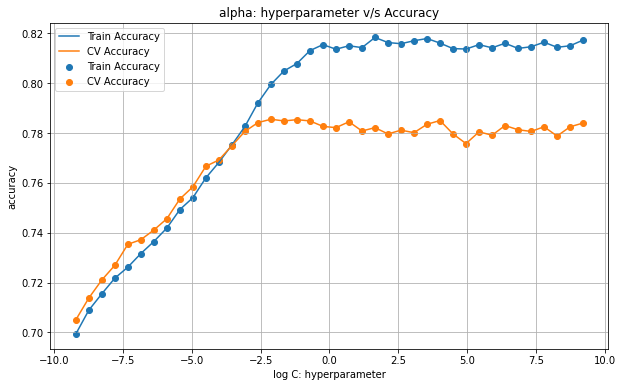

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(log_alphas, train_auc, label='Train Accuracy')
plt.plot(log_alphas, cv_auc, label='CV Accuracy')

plt.scatter(log_alphas, train_auc, label='Train Accuracy')
plt.scatter(log_alphas, cv_auc, label='CV Accuracy')

plt.legend()
plt.xlabel("log C: hyperparameter")
plt.ylabel("accuracy")
plt.title("alpha: hyperparameter v/s Accuracy")
plt.grid()
plt.show()

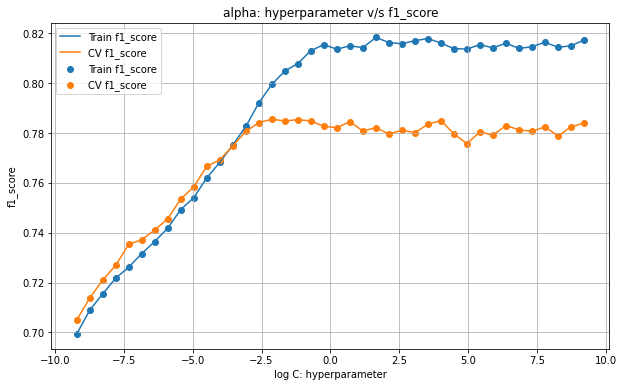

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(log_alphas, train_f1, label='Train f1_score')
plt.plot(log_alphas, cv_f1, label='CV f1_score')

plt.scatter(log_alphas, train_f1, label='Train f1_score')
plt.scatter(log_alphas, cv_f1, label='CV f1_score')

plt.legend()
plt.xlabel("log C: hyperparameter")
plt.ylabel("f1_score")
plt.title("alpha: hyperparameter v/s f1_score")
plt.grid()
plt.show()

In [ ]:
print(best_model_random.best_estimator_)

LogisticRegression(C=0.30702906297578497, multi_class='multinomial')


In [ ]:
log = LogisticRegression(C=best_c,multi_class='multinomial')

In [ ]:
log=log.fit(train1,y1_train)
from sklearn.metrics import f1_score
print('train_f1_score',f1_score(y1_train,log.predict(train1),average='micro'))
print('cv_f1_score',f1_score(y1_cv,log.predict(cv1),average='micro'))

train_f1_score 0.8078750467639355
cv_f1_score 0.7853535353535354


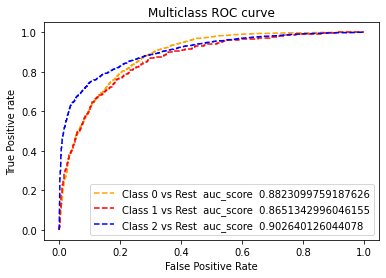

In [ ]:
#https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/
#https://machinelearningmastery.com/overfitting-machine-learning-models/
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics


# split into train/test sets
#X_train, X_test, y_train, y_test = train1,cv1,y1_train,y1_cv

# fit model
clf = OneVsRestClassifier(LogisticRegression(C=best_c,multi_class='multinomial'))
clf.fit(train1, y1_train)
pred = clf.predict(cv1)
pred_prob = clf.predict_proba(cv1)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

auc_score={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y1_cv, pred_prob[:,i], pos_label=i)
    # auc scores
    auc_score[i] = metrics.auc(fpr[i], tpr[i])
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest'+'  auc_score  '+str(auc_score[0]))
plt.plot(fpr[1], tpr[1], linestyle='--',color='red', label='Class 1 vs Rest'+'  auc_score  '+str(auc_score[1]))
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest'+'  auc_score  '+str(auc_score[2]))
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

In [ ]:
classifiers=[log,log]
trainx=[train1,cv1]
trainy=[y1_train,y1_cv]
title=['train_cm_log_reg','cv_cm_log_reg']

*********confusion matrices for cv data***********


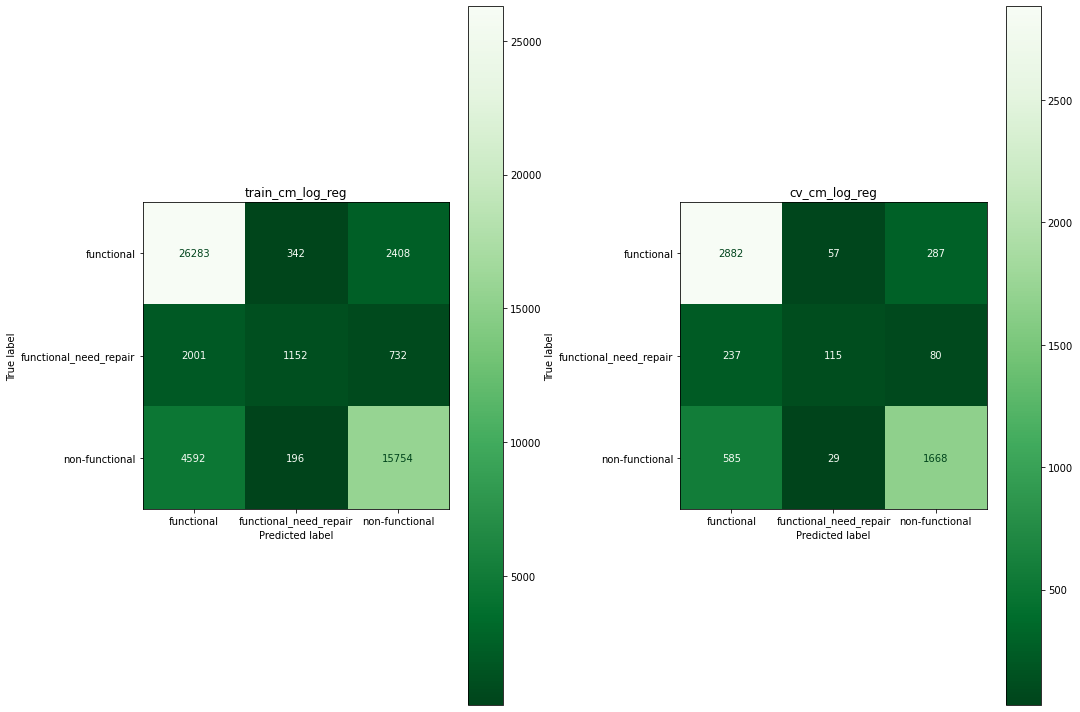

In [ ]:
#https://stackoverflow.com/questions/61016110/plot-multiple-confusion-matrices-with-plot-confusion-matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))
print('*********confusion matrices for cv data***********')
i=0
for cls, ax,cv1,y1_cv,title in zip(classifiers, axes.flatten(),trainx,trainy,title):
    
    plot_confusion_matrix(cls, 
                          cv1, 
                          y1_cv, 
                          ax=ax,
                          cmap='Greens_r',
                          display_labels=['functional','functional_need_repair','non-functional'])
    
    ax.set_title(str(title))
    #ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
#https://stackoverflow.com/questions/39662398/scikit-learn-output-metrics-classification-report-into-csv-tab-delimited-format
from sklearn.metrics import classification_report

print(classification_report(y1_cv, pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83      3226
           1       0.57      0.24      0.34       432
           2       0.83      0.73      0.78      2282

    accuracy                           0.79      5940
   macro avg       0.72      0.62      0.65      5940
weighted avg       0.78      0.79      0.78      5940



In [ ]:
from sklearn.metrics import classification_report
classificationReport = classification_report(y1_cv, pred,output_dict=True)
df4 = pd.DataFrame(classificationReport).transpose()
df4

,precision,recall,f1-score,support
0,0.777242,0.899876,0.834076,3226.000000
1,0.565217,0.240741,0.337662,432.000000
2,0.826818,0.732252,0.776667,2282.000000
accuracy,0.787542,0.787542,0.787542,0.787542
macro avg,0.723093,0.624290,0.649468,5940.000000
weighted avg,0.780868,0.787542,0.775918,5940.000000


In [ ]:
#https://stackoverflow.com/questions/28075699/coloring-cells-in-pandas
df4.style.applymap(lambda x: "background-color: red" if x>0 else "background-color: white")

,precision,recall,f1-score,support
0,0.777242,0.899876,0.834076,3226.000000
1,0.565217,0.240741,0.337662,432.000000
2,0.826818,0.732252,0.776667,2282.000000
accuracy,0.787542,0.787542,0.787542,0.787542
macro avg,0.723093,0.624290,0.649468,5940.000000
weighted avg,0.780868,0.787542,0.775918,5940.000000


###Naive bayes

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
#NB.fit(train1, y1_train)

In [ ]:
grid_params = {
'alpha' : [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000,10000,100000]}

In [ ]:
NB_rs = GridSearchCV(NB, grid_params, verbose = 1,scoring='accuracy',return_train_score=True, cv=3, n_jobs = -1)
# fit the model on our train set
NB_rs = NB_rs.fit(train1, y1_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
pd.DataFrame(NB_rs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.034091,0.005349,0.005992,0.000086,0.00001,{'alpha': 1e-05},0.672222,0.673513,0.667116,0.670950,0.002762,5,0.730359,0.732239,0.732997,0.731865,0.001109
1,0.033279,0.014256,0.009774,0.005616,0.0001,{'alpha': 0.0001},0.673569,0.674018,0.667116,0.671568,0.003153,4,0.729686,0.731313,0.732407,0.731135,0.001118
2,0.041597,0.004861,0.015058,0.007241,0.001,{'alpha': 0.001},0.674242,0.675309,0.668182,0.672578,0.003139,3,0.727694,0.729545,0.730584,0.729274,0.001195
3,0.066138,0.002591,0.013768,0.006893,0.1,{'alpha': 0.1},0.670146,0.669753,0.664422,0.668107,0.002611,6,0.712009,0.712374,0.714141,0.712841,0.000931
4,0.051206,0.004628,0.020693,0.000972,1,{'alpha': 1},0.676599,0.682548,0.672559,0.677235,0.004103,2,0.706902,0.707379,0.711588,0.708623,0.002105
5,0.068945,0.002336,0.015646,0.004161,10,{'alpha': 10},0.713805,0.715320,0.705892,0.711672,0.004134,1,0.721801,0.722727,0.721717,0.722082,0.000458
6,0.060042,0.013957,0.011630,0.001144,100,{'alpha': 100},0.653423,0.655948,0.652974,0.654115,0.001309,7,0.655303,0.652778,0.656650,0.654910,0.001605
7,0.055829,0.009905,0.010377,0.001794,1000,{'alpha': 1000},0.571437,0.571268,0.571717,0.571474,0.000185,8,0.572194,0.571128,0.571661,0.571661,0.000435
8,0.042986,0.002598,0.012672,0.000166,10000,{'alpha': 10000},0.543042,0.543098,0.543266,0.543135,0.000095,9,0.543182,0.543154,0.543070,0.543135,0.000048
9,0.039889,0.010597,0.008739,0.002922,100000,{'alpha': 100000},0.543042,0.543098,0.543098,0.543079,0.000026,10,0.543098,0.543070,0.543070,0.543079,0.000013


In [ ]:
best_alpha=NB_rs.best_params_['alpha']
print('best_alpha',best_alpha)

best_alpha 10


In [ ]:
NB_rs=MultinomialNB(alpha=best_alpha)
NB_rs.fit(train1, y1_train)

MultinomialNB(alpha=10)

In [ ]:
#https://colab.research.google.com/drive/1G_JZmgcaRRGcJyHQRm2P0frGkirkk0fI#scrollTo=tOW5wy1R9dQ6

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import math

train_auc = []
train_f1=[]

cv_f1=[]
cv_auc = []
log_alphas = []

alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000,10000,100000]

for i in alpha:
    
    NB_rs = MultinomialNB(alpha=i)
    NB_rs.fit(train1, y1_train)

    y_train_pred = NB_rs.predict(train1)   
    y_cv_pred =NB_rs.predict(cv1)
    

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(accuracy_score(y1_train,y_train_pred))
    cv_auc.append(accuracy_score(y1_cv, y_cv_pred))

    train_f1.append(f1_score(y1_train,log.predict(train1),average='micro'))
    cv_f1.append(f1_score(y1_cv,log.predict(cv1),average='micro'))



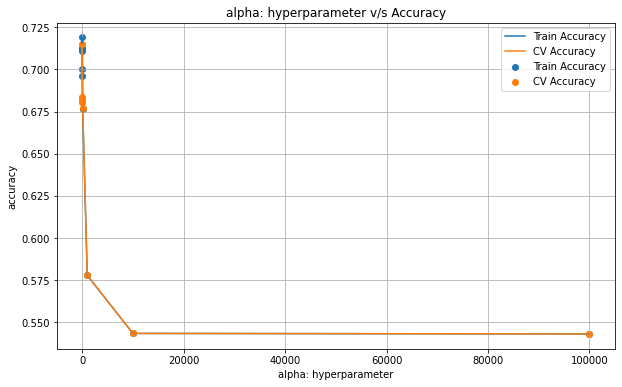

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(alpha, train_auc, label='Train Accuracy')
plt.plot(alpha, cv_auc, label='CV Accuracy')

plt.scatter(alpha, train_auc, label='Train Accuracy')
plt.scatter(alpha, cv_auc, label='CV Accuracy')

plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("accuracy")
plt.title("alpha: hyperparameter v/s Accuracy")
plt.grid()
plt.show()

both train and cv are overlapping

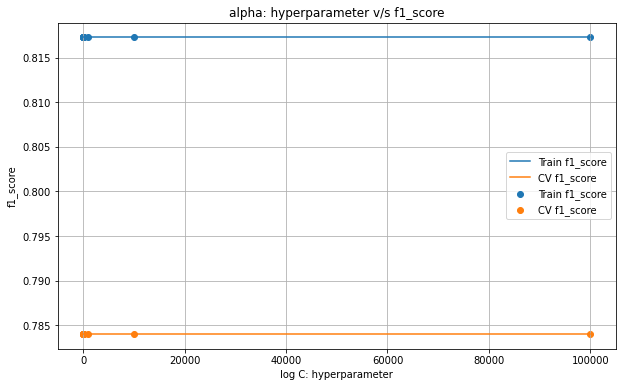

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(alpha, train_f1, label='Train f1_score')
plt.plot(alpha, cv_f1, label='CV f1_score')

plt.scatter(alpha, train_f1, label='Train f1_score')
plt.scatter(alpha, cv_f1, label='CV f1_score')

plt.legend()
plt.xlabel("log C: hyperparameter")
plt.ylabel("f1_score")
plt.title("alpha: hyperparameter v/s f1_score")
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score


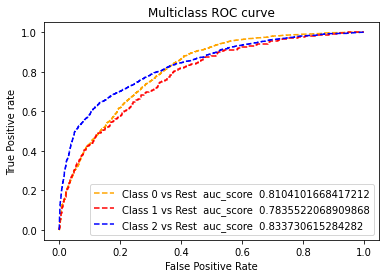

In [ ]:
#https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/
#https://machinelearningmastery.com/overfitting-machine-learning-models/
#https://stackoverflow.com/questions/45332410/roc-for-multiclass-classification
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score



# split into train/test sets
#X_train, X_test, y_train, y_test = train1,cv1,y1_train,y1_cv

# fit model
clf = OneVsRestClassifier(MultinomialNB(alpha=10))
clf.fit(train1, y1_train)
pred = clf.predict(cv1)
pred_prob = clf.predict_proba(cv1)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
auc_score={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y1_cv, pred_prob[:,i], pos_label=i)
    # auc scores
    auc_score[i] = metrics.auc(fpr[i], tpr[i])
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest'+'  auc_score  '+str(auc_score[0]))
plt.plot(fpr[1], tpr[1], linestyle='--',color='red', label='Class 1 vs Rest'+'  auc_score  '+str(auc_score[1]))
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest'+'  auc_score  '+str(auc_score[2]))
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

In [ ]:
print('train_f1_score',f1_score(y1_train,NB_rs.predict(train1),average='micro'))
print('cv_f1_score',f1_score(y1_cv,NB_rs.predict(cv1),average='micro'))

train_f1_score 0.543078937523382
cv_f1_score 0.5430976430976431


In [ ]:
from sklearn.metrics import classification_report
classificationReport = classification_report(y1_cv, pred,output_dict=True)
df5 = pd.DataFrame(classificationReport).transpose()
df5
#https://stackoverflow.com/questions/28075699/coloring-cells-in-pandas
df5.style.applymap(lambda x: "background-color: blue" if x>0 else "background-color: white")

,precision,recall,f1-score,support
0,0.729819,0.823931,0.774024,3226.000000
1,0.542857,0.043981,0.081370,432.000000
2,0.698188,0.692375,0.695270,2282.000000
accuracy,0.716667,0.716667,0.716667,0.716667
macro avg,0.656955,0.520096,0.516888,5940.000000
weighted avg,0.704070,0.716667,0.693394,5940.000000


###Light bgm

In [ ]:
#https://www.kaggle.com/code/prashant111/lightgbm-classifier-in-python

from sklearn.metrics import f1_score
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV 
gridParams = {
    'max_depth' : [50,100,150,200,300,1000,1500],
    'random_state' : [501], 
    'estimators': [10,50,100,200,300,1000,2000]
    }

In [ ]:
lgb = lgb.LGBMClassifier()
lgb_RS=RandomizedSearchCV  (lgb, gridParams,cv=2, scoring='accuracy',verbose=1,return_train_score=True)
lgb_RS.fit(train1,y1_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2, estimator=LGBMClassifier(),
                   param_distributions={'estimators': [10, 50, 100, 200, 300,
                                                       1000, 2000],
                                        'max_depth': [50, 100, 150, 200, 300,
                                                      1000, 1500],
                                        'random_state': [501]},
                   return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
lgb_RS.best_params_

{'random_state': 501, 'max_depth': 100, 'estimators': 50}

In [ ]:
pd.DataFrame(lgb_RS.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_state,param_max_depth,param_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,2.890149,0.035644,0.365287,0.008031,501,100,50,"{'random_state': 501, 'max_depth': 100, 'estim...",0.773812,0.777179,0.775496,0.001684,1,0.796334,0.796184,0.796259,0.000075
1,3.196432,0.277470,0.374666,0.024339,501,200,10,"{'random_state': 501, 'max_depth': 200, 'estim...",0.773812,0.777179,0.775496,0.001684,1,0.796334,0.796184,0.796259,0.000075
2,3.189575,0.399256,0.361004,0.009516,501,200,300,"{'random_state': 501, 'max_depth': 200, 'estim...",0.773812,0.777179,0.775496,0.001684,1,0.796334,0.796184,0.796259,0.000075
3,2.848379,0.044993,0.367435,0.007394,501,1500,100,"{'random_state': 501, 'max_depth': 1500, 'esti...",0.773812,0.777179,0.775496,0.001684,1,0.796334,0.796184,0.796259,0.000075
4,3.203110,0.257978,0.384583,0.002642,501,300,1000,"{'random_state': 501, 'max_depth': 300, 'estim...",0.773812,0.777179,0.775496,0.001684,1,0.796334,0.796184,0.796259,0.000075
5,3.246811,0.400480,0.367471,0.000905,501,1500,2000,"{'random_state': 501, 'max_depth': 1500, 'esti...",0.773812,0.777179,0.775496,0.001684,1,0.796334,0.796184,0.796259,0.000075
6,2.898398,0.029069,0.377970,0.010956,501,1000,1000,"{'random_state': 501, 'max_depth': 1000, 'esti...",0.773812,0.777179,0.775496,0.001684,1,0.796334,0.796184,0.796259,0.000075
7,3.194749,0.249255,0.385083,0.004534,501,150,200,"{'random_state': 501, 'max_depth': 150, 'estim...",0.773812,0.777179,0.775496,0.001684,1,0.796334,0.796184,0.796259,0.000075
8,3.175951,0.385100,0.372769,0.007415,501,200,200,"{'random_state': 501, 'max_depth': 200, 'estim...",0.773812,0.777179,0.775496,0.001684,1,0.796334,0.796184,0.796259,0.000075
9,2.936708,0.127863,0.376129,0.002585,501,300,200,"{'random_state': 501, 'max_depth': 300, 'estim...",0.773812,0.777179,0.775496,0.001684,1,0.796334,0.796184,0.796259,0.000075


In [ ]:
best_depth=lgb_RS.best_params_['max_depth']
best_estimators=lgb_RS.best_params_['estimators']
bestScore_1=lgb_RS.best_score_

In [ ]:
import lightgbm as lgb
lgb1 = lgb.LGBMClassifier(n_estimators=best_estimators,max_depth=best_depth)
#lgb1=lgb1.LGBMClassifier(n_estimators=300,max_depth=300)
lgb1.fit(train1,y1_train)

LGBMClassifier(max_depth=100, n_estimators=50)

In [ ]:
print('train f1 score',f1_score(y1_train,lgb1.predict(train1),average='micro'))
print('cv f1 scpre',f1_score(y1_cv,lgb1.predict(cv1),average='micro'))

train f1 score 0.7735690235690237
cv f1 scpre 0.7715488215488215


In [ ]:
#https://colab.research.google.com/drive/1G_JZmgcaRRGcJyHQRm2P0frGkirkk0fI#scrollTo=tOW5wy1R9dQ6
from sklearn.metrics import f1_score
import lightgbm as lgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import math
import lightgbm 
from lightgbm import *

train_auc = []
train_f1=[]

cv_f1=[]
cv_auc = []
log_alphas = []

max_depth = [50,100,150,200,300,1000,1500]
estimators= [10,50,100,200,300,1000,2000]

for i,j in zip(max_depth,estimators):

    
    
    lgb2 = lgb.LGBMClassifier(n_estimators=j,max_depth=i)
    lgb2.fit(train1, y1_train)

    y_train_pred = lgb2.predict(train1)   
    y_cv_pred =lgb2.predict(cv1)
    

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(accuracy_score(y1_train,y_train_pred))
    cv_auc.append(accuracy_score(y1_cv, y_cv_pred))

    train_f1.append(f1_score(y1_train,lgb2.predict(train1),average='micro'))
    cv_f1.append(f1_score(y1_cv,lgb2.predict(cv1),average='micro'))



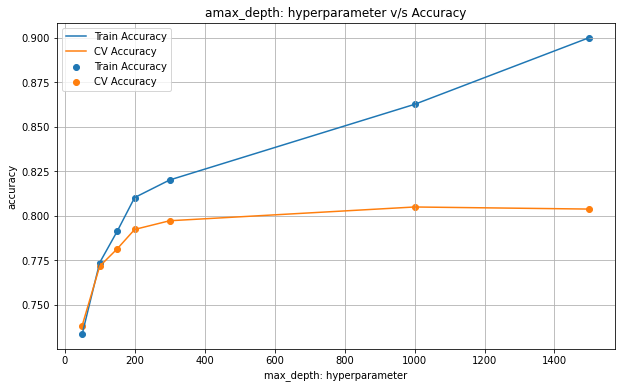

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(max_depth, train_auc, label='Train Accuracy')
plt.plot(max_depth, cv_auc, label='CV Accuracy')

plt.scatter(max_depth, train_auc, label='Train Accuracy')
plt.scatter(max_depth, cv_auc, label='CV Accuracy')

plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("accuracy")
plt.title("amax_depth: hyperparameter v/s Accuracy")
plt.grid()
plt.show()

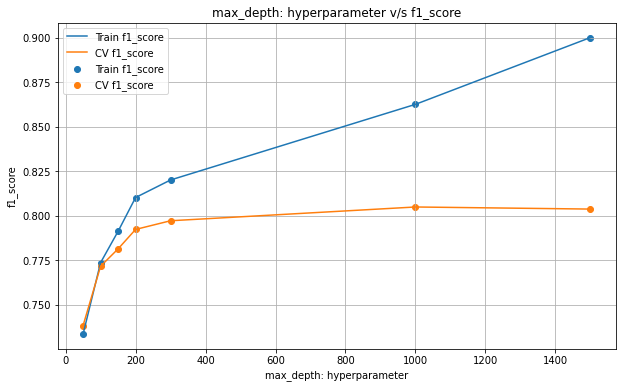

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(max_depth, train_f1, label='Train f1_score')
plt.plot(max_depth, cv_f1, label='CV f1_score')

plt.scatter(max_depth, train_f1, label='Train f1_score')
plt.scatter(max_depth, cv_f1, label='CV f1_score')

plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("f1_score")
plt.title("max_depth: hyperparameter v/s f1_score")
plt.grid()
plt.show()

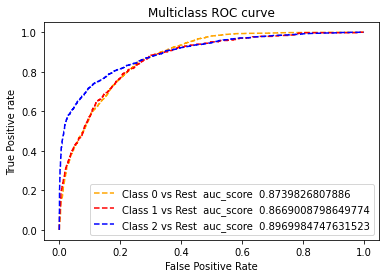

In [ ]:
#https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/
#https://machinelearningmastery.com/overfitting-machine-learning-models/
#https://stackoverflow.com/questions/45332410/roc-for-multiclass-classification
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics


# split into train/test sets
#X_train, X_test, y_train, y_test = train1,cv1,y1_train,y1_cv

# fit model


clf = OneVsRestClassifier(lgb.LGBMClassifier(n_estimators=best_estimators,max_depth=best_depth))
clf.fit(train1, y1_train)
pred = clf.predict(cv1)
pred_prob = clf.predict_proba(cv1)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
auc_score={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y1_cv, pred_prob[:,i], pos_label=i)
    # auc scores
    auc_score[i] = metrics.auc(fpr[i], tpr[i])
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest'+'  auc_score  '+str(auc_score[0]))
plt.plot(fpr[1], tpr[1], linestyle='--',color='red', label='Class 1 vs Rest'+'  auc_score  '+str(auc_score[1]))
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest'+'  auc_score  '+str(auc_score[2]))
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC lgbm',dpi=300); 

In [ ]:
classifiers=[clf,clf]
trainx=[train1,cv1]
trainy=[y1_train,y1_cv]
title=['train_cm_lgbm','cv_cm_lgbm']

*********confusion matrices for cv data***********


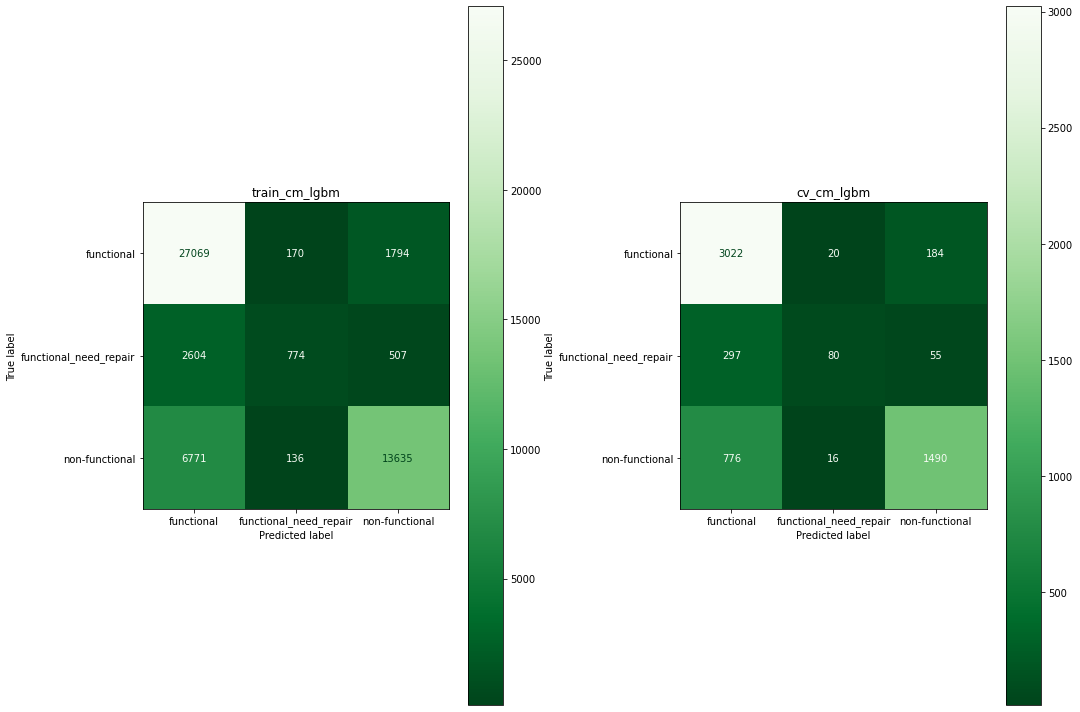

In [ ]:
#https://stackoverflow.com/questions/61016110/plot-multiple-confusion-matrices-with-plot-confusion-matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))
print('*********confusion matrices for cv data***********')
i=0
for cls, ax,cv1,y1_cv,title in zip(classifiers, axes.flatten(),trainx,trainy,title):
    
    plot_confusion_matrix(cls, 
                          cv1, 
                          y1_cv, 
                          ax=ax,
                          cmap='Greens_r',
                          display_labels=['functional','functional_need_repair','non-functional'])
    
    ax.set_title(str(title))
    #ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classificationReport = classification_report(y1_cv, pred,output_dict=True)
df5 = pd.DataFrame(classificationReport).transpose()
df5

,precision,recall,f1-score,support
0,0.737973,0.936764,0.825570,3226.000000
1,0.689655,0.185185,0.291971,432.000000
2,0.861770,0.652936,0.742957,2282.000000
accuracy,0.773064,0.773064,0.773064,0.773064
macro avg,0.763133,0.591628,0.620166,5940.000000
weighted avg,0.782019,0.773064,0.755025,5940.000000


In [ ]:
#https://stackoverflow.com/questions/28075699/coloring-cells-in-pandas
df5.style.applymap(lambda x: "background-color: blue" if x>0 else "background-color: white")

,precision,recall,f1-score,support
0,0.737973,0.936764,0.825570,3226.000000
1,0.689655,0.185185,0.291971,432.000000
2,0.861770,0.652936,0.742957,2282.000000
accuracy,0.773064,0.773064,0.773064,0.773064
macro avg,0.763133,0.591628,0.620166,5940.000000
weighted avg,0.782019,0.773064,0.755025,5940.000000


###RF model

In [ ]:
#https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial
from sklearn.model_selection import RandomizedSearchCV
gridParams = {'max_depth' : [50,100,150,200,300,500,700],
  'n_estimators' : [100,200,300,500,1000,1500]}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF = RandomizedSearchCV(RF,gridParams,verbose=1,cv=2,scoring='accuracy',return_train_score=True,n_jobs = -1,n_iter=10)
RF.fit(train1,y1_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [50, 100, 150, 200, 300,
                                                      500, 700],
                                        'n_estimators': [100, 200, 300, 500,
                                                         1000, 1500]},
                   return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
df_cv=pd.DataFrame(RF.cv_results_)

In [ ]:
df_cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,132.897527,0.015475,2.020427,0.011149,200,700,"{'n_estimators': 200, 'max_depth': 700}",0.789936,0.788290,0.789113,0.000823,10,0.999813,0.999701,0.999757,0.000056
1,44.312465,0.342663,1.032316,0.018700,100,50,"{'n_estimators': 100, 'max_depth': 50}",0.789675,0.793640,0.791657,0.001983,1,0.968275,0.966293,0.967284,0.000991
2,201.790749,0.600536,3.042209,0.065468,300,700,"{'n_estimators': 300, 'max_depth': 700}",0.789787,0.790423,0.790105,0.000318,7,0.999813,0.999701,0.999757,0.000056
3,666.591856,1.558671,10.631209,0.523815,1000,700,"{'n_estimators': 1000, 'max_depth': 700}",0.790947,0.790610,0.790778,0.000168,2,0.999813,0.999701,0.999757,0.000056
4,675.015047,0.731373,10.105608,0.092951,1000,200,"{'n_estimators': 1000, 'max_depth': 200}",0.790647,0.790647,0.790647,0.000000,5,0.999813,0.999701,0.999757,0.000056
5,661.787550,0.783667,10.196388,0.430113,1000,100,"{'n_estimators': 1000, 'max_depth': 100}",0.790049,0.790348,0.790198,0.000150,6,0.999813,0.999701,0.999757,0.000056
6,1014.904571,9.398903,19.141617,1.056229,1500,300,"{'n_estimators': 1500, 'max_depth': 300}",0.790572,0.790797,0.790685,0.000112,4,0.999813,0.999701,0.999757,0.000056
7,65.641858,0.239354,0.997599,0.044505,100,200,"{'n_estimators': 100, 'max_depth': 200}",0.789375,0.788964,0.789169,0.000206,9,0.999813,0.999663,0.999738,0.000075
8,1016.343805,3.632469,15.142551,0.406946,1500,200,"{'n_estimators': 1500, 'max_depth': 200}",0.790759,0.790685,0.790722,0.000037,3,0.999813,0.999701,0.999757,0.000056
9,1027.886936,1.333170,15.870273,0.895900,1500,500,"{'n_estimators': 1500, 'max_depth': 500}",0.789487,0.789787,0.789637,0.000150,8,0.999813,0.999701,0.999757,0.000056


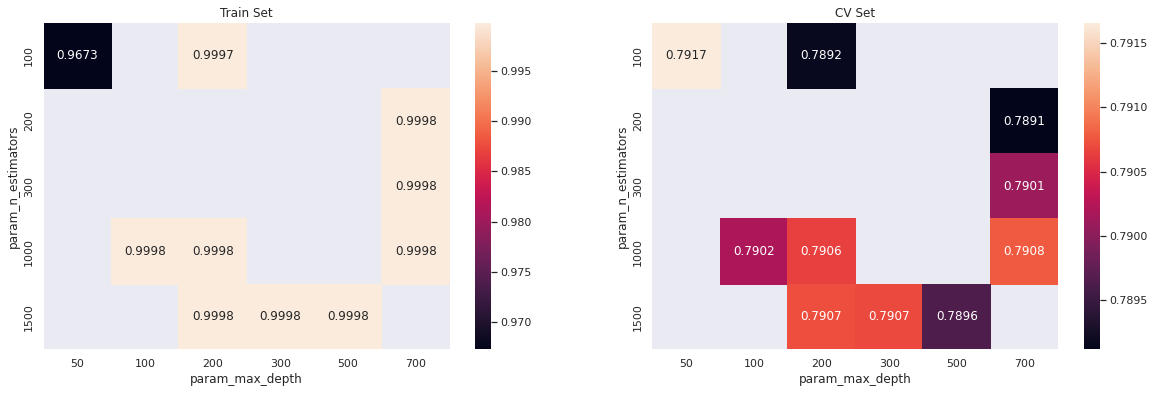

In [ ]:
import seaborn as sns; sns.set()
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
max_scores1 = pd.DataFrame(RF.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score','mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [ ]:
RF.best_params_

{'n_estimators': 100, 'max_depth': 50}

In [ ]:
best_depth=RF.best_params_['max_depth']
best_estimators=RF.best_params_['n_estimators']
bestScore_1=RF.best_score_

In [ ]:
RF1 = RandomForestClassifier(n_estimators= best_estimators, max_depth= best_depth)
RF1.fit(train1,y1_train)

RandomForestClassifier(max_depth=50)

In [ ]:
df_cv.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_estimators', 'param_max_depth', 'params', 'split0_test_score',
       'split1_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [ ]:
from sklearn import metrics

In [ ]:
#https://colab.research.google.com/drive/1G_JZmgcaRRGcJyHQRm2P0frGkirkk0fI#scrollTo=tOW5wy1R9dQ6
from sklearn.metrics import f1_score
import lightgbm as lgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import math
import lightgbm 
from lightgbm import *

train_auc = []
train_f1=[]

cv_f1=[]
cv_auc = []
log_alphas = []

max_depth = [50,100,150,200,300]
estimators= [100,200,300,1000,1100]

for i,j in zip(max_depth,estimators):

    
    
    RF = RandomForestClassifier(n_estimators=best_estimators,max_depth=best_depth)
    RF.fit(train1, y1_train)

    y_train_pred = RF.predict(train1)   
    y_cv_pred =RF.predict(cv1)
    

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(accuracy_score(y1_train,y_train_pred))
    cv_auc.append(accuracy_score(y1_cv, y_cv_pred))

    train_f1.append(f1_score(y1_train,RF.predict(train1),average='micro'))
    cv_f1.append(f1_score(y1_cv,RF.predict(cv1),average='micro'))



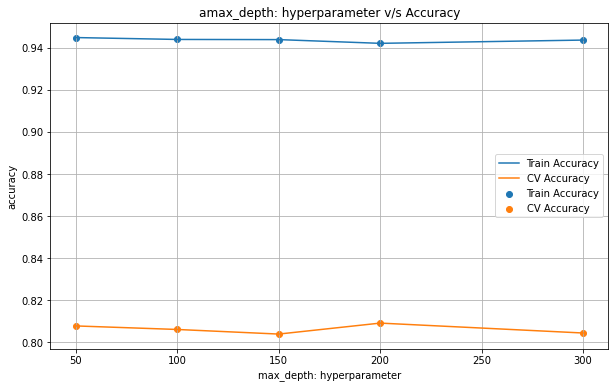

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(max_depth, train_auc, label='Train Accuracy')
plt.plot(max_depth, cv_auc, label='CV Accuracy')

plt.scatter(max_depth, train_auc, label='Train Accuracy')
plt.scatter(max_depth, cv_auc, label='CV Accuracy')

plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("accuracy")
plt.title("amax_depth: hyperparameter v/s Accuracy")
plt.grid()
plt.show()

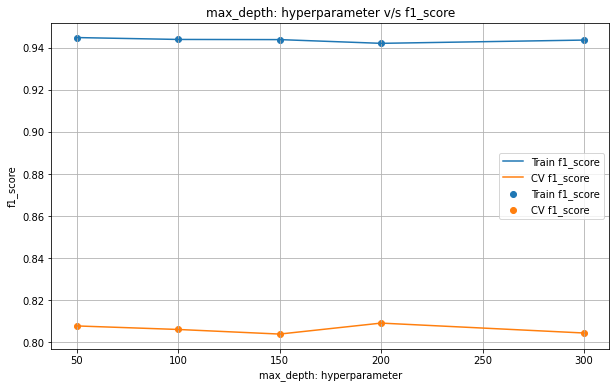

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(max_depth, train_f1, label='Train f1_score')
plt.plot(max_depth, cv_f1, label='CV f1_score')

plt.scatter(max_depth, train_f1, label='Train f1_score')
plt.scatter(max_depth, cv_f1, label='CV f1_score')

plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("f1_score")
plt.title("max_depth: hyperparameter v/s f1_score")
plt.grid()
plt.show()

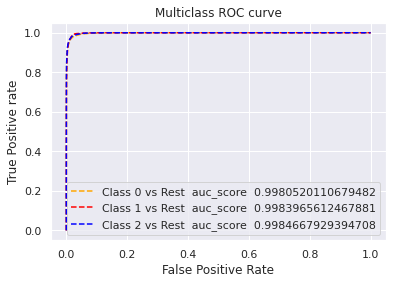

In [ ]:
#https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/
#https://machinelearningmastery.com/overfitting-machine-learning-models/
#https://stackoverflow.com/questions/45332410/roc-for-multiclass-classification
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics


# split into train/test sets
#X_train, X_test, y_train, y_test = train1,cv1,y1_train,y1_cv

# fit model


clf = OneVsRestClassifier(RF1)
clf.fit(train1, y1_train)
pred = clf.predict(cv1)
pred_prob = clf.predict_proba(cv1)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
auc_score={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y1_cv, pred_prob[:,i], pos_label=i)
    # auc scores
    auc_score[i] = metrics.auc(fpr[i], tpr[i])
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest'+'  auc_score  '+str(auc_score[0]))
plt.plot(fpr[1], tpr[1], linestyle='--',color='red', label='Class 1 vs Rest'+'  auc_score  '+str(auc_score[1]))
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest'+'  auc_score  '+str(auc_score[2]))
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC lgbm',dpi=300); 

In [ ]:
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
from sklearn.metrics import confusion_matrix
y_train_pred1=RF.predict(train1)
y_test_pred1=RF.predict(cv1)

cf_matrix_train1 = confusion_matrix(y1_train, y_train_pred1)
cf_matrix_test1 = confusion_matrix(y1_cv, y_test_pred1)
print(cf_matrix_train1,'***',cf_matrix_test1)

[[28989     4    40]
 [  827  3012    46]
 [ 1313     0 19229]] *** [[3002   48  176]
 [ 259  103   70]
 [ 575   16 1691]]


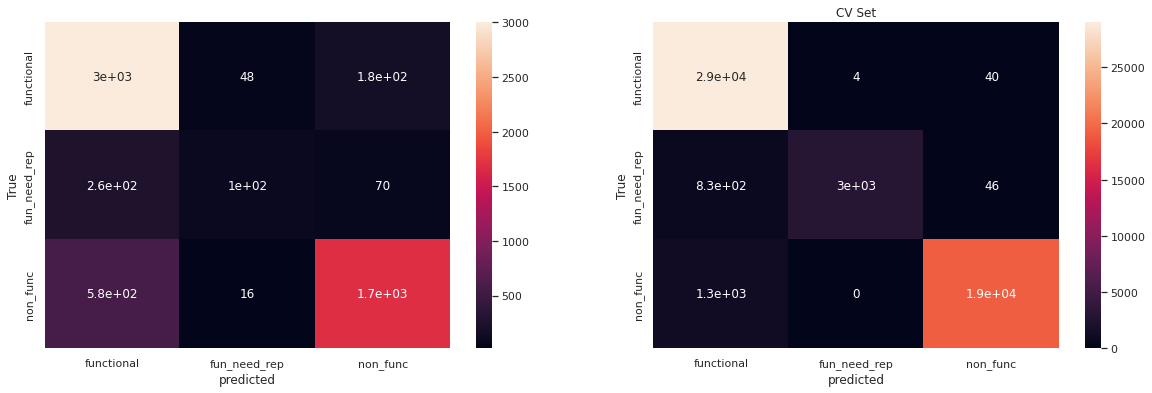

In [ ]:
#https://stackoverflow.com/questions/32723798/how-do-i-add-a-title-and-axis-labels-to-seaborn-heatmap
import seaborn as sns; sns.set()

fig, ax = plt.subplots(1,2, figsize=(20,6))
x_axis_labels = ['functional', 'fun_need_rep','non_func'] # labels for x-axis
y_axis_labels = ['functional', 'fun_need_rep','non_func'] # labels for y-axis
categories = ['functional', 'fun_need_rep','non_func']

sns.heatmap(cf_matrix_test1,xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True,ax=ax[0])
sns.heatmap(cf_matrix_train1,xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True,ax = ax[1])

ax[0].set_xlabel('predicted')
ax[0].set_ylabel('True')
ax[0].set_title('Train Set')

ax[1].set_xlabel('predicted')
ax[1].set_ylabel('True')
ax[1].set_title('CV Set')

plt.show()

In [ ]:
from sklearn.metrics import classification_report
classificationReport = classification_report(y1_cv, RF.predict(cv1),output_dict=True)
df5 = pd.DataFrame(classificationReport).transpose()
df5

,precision,recall,f1-score,support
0,0.931254,0.998484,0.963698,29033.000000
1,0.998674,0.775290,0.872917,3885.000000
2,0.995548,0.936082,0.964900,20542.000000
accuracy,0.958287,0.958287,0.958287,0.958287
macro avg,0.975158,0.903285,0.933838,53460.000000
weighted avg,0.960858,0.958287,0.957563,53460.000000


In [ ]:
#https://stackoverflow.com/questions/28075699/coloring-cells-in-pandas
df5.style.applymap(lambda x: "background-color: blue" if x>0 else "background-color: white")

,precision,recall,f1-score,support
0,0.931254,0.998484,0.963698,29033.000000
1,0.998674,0.775290,0.872917,3885.000000
2,0.995548,0.936082,0.964900,20542.000000
accuracy,0.958287,0.958287,0.958287,0.958287
macro avg,0.975158,0.903285,0.933838,53460.000000
weighted avg,0.960858,0.958287,0.957563,53460.000000


In [ ]:
from sklearn.metrics import f1_score
print('train_f1_score',f1_score(y1_train,RF.predict(train1),average='micro'))
print('cv_f1_score',f1_score(y1_cv,RF.predict(cv1),average='micro'))

train_f1_score 0.9582865693976805
cv_f1_score 0.8074074074074074


# 2)Ohe without PCA

In [ ]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 34.3 MB/s 
     |████████████████████████████████| 9.9 MB 57.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
#importing libraries
import seaborn as sns
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

In [ ]:
import pandas as pd
df_train_label=pd.read_csv('/content/drive/MyDrive/self case study 1/train labels.csv')
df_train_var=pd.read_csv('/content/drive/MyDrive/self case study 1/train variables.csv')
df=df_train_var.merge(df_train_label)

In [ ]:
df_test=pd.read_csv('/content/702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv')
df_test.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


preprocess on text data

In [ ]:
# Combining all the above stundents 
from tqdm import tqdm
def preprocess_text(df,col):
    preprocessed_text = []
    # tqdm is for printing the status bar
    df[col] = df[col] .str.replace('/', ' ')
    df[col] = df[col].str.lower()
    df[col] = df[col].str.replace(',','')
    df[col] = df[col].str.replace('.','')
    return df[col] 

In [ ]:
  #df_test.population=df.population.replace(0,df_test.population.mean())
  #https://stackoverflow.com/questions/17097236/replace-invalid-values-with-none-in-pandas-dataframe
  df_test.gps_height=df.gps_height.where(df.gps_height< 0, df.gps_height.mean())
  df_test.population=df.population.replace(0,df.population.mean())
  #df['funder']=df['funder'].replace(np.nan,df['funder'].mode)
  df_test['funder'] = df_test['funder'].fillna('unknown')
  df_test['installer']=df_test['installer'].fillna('unknown')
  df_test['subvillage']=df_test['subvillage'].fillna('unknown')
  df_test['public_meeting']=df_test['public_meeting'].fillna('unknown')
  df_test['scheme_management']=df_test['scheme_management'].fillna('unknown')
  df_test.amount_tsh=df.amount_tsh.replace(0,df.amount_tsh.median())


In [ ]:
df.gps_height=df.gps_height.where(df.gps_height< 0, df.gps_height.mean())
df.population=df.population.replace(0,df.population.mean())
#df['funder']=df['funder'].replace(np.nan,df['funder'].mode.values[0])
df['funder'] = df['funder'].fillna('unknown')
df['installer']=df['installer'].fillna('unknown')
df['subvillage']=df['subvillage'].fillna('unknown')
df['public_meeting']=df['public_meeting'].fillna('unknown')
df['scheme_management']=df['scheme_management'].fillna('unknown')
df.amount_tsh=df.amount_tsh.replace(0,df.amount_tsh.median())

In [ ]:
df['region'] = preprocess_text(df,'region')
df['lga']=preprocess_text(df,'lga')
df['ward']=preprocess_text(df,'ward')
df['public_meeting']=preprocess_text(df,'public_meeting')
df['recorded_by']=preprocess_text(df,'recorded_by')

df['scheme_name']=preprocess_text(df,'scheme_name')
#df_mlm['permit']=preprocess_text(df_mlm,'permit')
df_test['extraction_type']=preprocess_text(df,'extraction_type')

df['extraction_type_group']=preprocess_text(df,'extraction_type_group')
df['extraction_type_class']=preprocess_text(df,'extraction_type_class')
df['management']=preprocess_text(df_test,'management')

df['management_group']=preprocess_text(df,'management_group')
df['water_quality']=preprocess_text(df,'water_quality')
df['quality_group']=preprocess_text(df_test,'quality_group')

df['funder'] = preprocess_text(df,'funder')
df['installer']=preprocess_text(df,'installer')
df['subvillage']=preprocess_text(df,'subvillage')
df['public_meeting']=preprocess_text(df,'public_meeting')
df['scheme_management']=preprocess_text(df,'scheme_management')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  if __name__ == '__main__':


In [ ]:
df_test['region'] = preprocess_text(df_test,'region')
df_test['lga']=preprocess_text(df_test,'lga')
df_test['ward']=preprocess_text(df_test,'ward')
df_test['public_meeting']=preprocess_text(df_test,'public_meeting')
df_test['recorded_by']=preprocess_text(df_test,'recorded_by')

df_test['scheme_name']=preprocess_text(df_test,'scheme_name')
#df_mlm['permit']=preprocess_text(df_mlm,'permit')
df_test['extraction_type']=preprocess_text(df_test,'extraction_type')

df_test['extraction_type_group']=preprocess_text(df_test,'extraction_type_group')
df_test['extraction_type_class']=preprocess_text(df_test,'extraction_type_class')
df_test['management']=preprocess_text(df_test,'management')

df_test['management_group']=preprocess_text(df_test,'management_group')
df_test['water_quality']=preprocess_text(df_test,'water_quality')
df_test['quality_group']=preprocess_text(df_test,'quality_group')

df_test['funder'] = preprocess_text(df_test,'funder')
df_test['installer']=preprocess_text(df_test,'installer')
df_test['subvillage']=preprocess_text(df_test,'subvillage')
df_test['public_meeting']=preprocess_text(df_test,'public_meeting')
df_test['scheme_management']=preprocess_text(df_test,'scheme_management')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  if __name__ == '__main__':


In [ ]:
from math import radians, cos, sin, asin, sqrt
from sklearn import preprocessing
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#https://datascience.stackexchange.com/questions/49553/combining-latitude-longitude-position-into-single-feature?rq=1

def single_pt_haversine(lat, lng, degrees=True):
    """
    'Single-point' Haversine: Calculates the great circle distance
    between a point on Earth and the (0, 0) lat-long coordinate
    """
    r = 6371 # Earth's radius (km). Have r = 3956 if you want miles

    # Convert decimal degrees to radians
    if degrees:
        lat, lng = map(radians, [lat, lng])

    # 'Single-point' Haversine formula
    a = sin(lat/2)**2 + cos(lat) * sin(lng/2)**2
    d = 2 * r * asin(sqrt(a)) 

    return d

df['harvesine_distance'] = [single_pt_haversine(x, y) for x, y in zip(df.latitude, df.longitude)]
df_test['harvesine_distance'] = [single_pt_haversine(x, y) for x, y in zip(df_test.latitude, df_test.longitude)]


Replace nan values with unknown,mean,median

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
def prepare_data(df,df_test):
  #df=df.dropna()
  #df.gps_height=df.gps_height.replace(0,df.gps_height.median())
  df.gps_height=df.gps_height.where(df.gps_height< 0, df.gps_height.mean())
  df.population=df.population.replace(0,df.population.mean())
  #df['funder']=df['funder'].replace(np.nan,df['funder'].mode.values[0])
  df['funder'] = df['funder'].fillna('unknown')
  df['installer']=df['installer'].fillna('unknown')
  df['subvillage']=df['subvillage'].fillna('unknown')
  df['public_meeting']=df['public_meeting'].fillna('unknown')
  df['scheme_management']=df['scheme_management'].fillna('unknown')
  df.amount_tsh=df.amount_tsh.replace(0,df.amount_tsh.median())
  X=df.drop(['status_group'],axis=1)
  y=df.status_group
  from sklearn.model_selection import train_test_split
  #split the data into train test by using stratified sampling technique
  X_train, X_cv, y_train, y_cv= train_test_split(X, y,stratify=y,test_size=0.10,random_state=42)
  #X_train, X_test, y_train= X,df_test,y
  X_test=df_test
  from sklearn import preprocessing
  le = preprocessing.LabelEncoder()
  le=le.fit(df.status_group)
  #list(le.classes_)
  y_train=le.transform(y_train)
  y_cv=le.transform(y_cv)
  

  # We are considering only the words which appeared in at least 5 documents(rows or projects)
  #below code shows vectorization through one hot encoding
  def dummy_enc(df,feature):
    #df[feature] = df[feature].fillna("Unknown")
    vectorizer = CountVectorizer(min_df=5)
    train = vectorizer.fit_transform(X_train[feature])
    test = vectorizer.transform(X_test[feature])
    cv=  vectorizer.transform(X_cv[feature])
    return train,test,cv
  
  #X_train['funder'] = X_train['funder'].fillna("Unknown")
  #X_test['funder'] = X_test['funder'].fillna("Unknown")
  funder_ohe_train,funder_ohe_test,funder_ohe_cv=dummy_enc(X_train,'funder')
 
  #X_train['installer'],X_test['installer'] = X_train['installer'].fillna("Unknown"),X_test['installer'].fillna("Unknown")
  installer_ohe_train,installer_ohe_test,installer_ohe_cv=dummy_enc(X_train,'installer')
  
  #
  wpt_name_ohe_train,wpt_name_ohe_test,wpt_name_ohe_cv=dummy_enc(X_train,'wpt_name')

  basin_dummy_ohe_train,basin_dummy_ohe_test,basin_dummy_ohe_cv = dummy_enc(X_train,'basin') 
  
  subvillage_ohe_train,subvillage_ohe_test,subvillage_ohe_cv = dummy_enc(X_train,'subvillage')

  region_ohe_train,region_ohe_test,region_ohe_cv = dummy_enc(X_train,'region') 

  lga_ohe_train,lga_ohe_test,lga_ohe_cv = dummy_enc(X_train,'lga')

  ward_ohe_train,ward_ohe_test,ward_ohe_cv = dummy_enc(X_train,'ward')
 
  #public_meeting_ohe_train,public_meeting_ohe_test = dummy_enc(X_train,'public_meeting')

  scheme_management_ohe_train,scheme_management_ohe_test,scheme_management_ohe_cv=dummy_enc(X_train,'scheme_management')

  #scheme_name_ohe_train,scheme_name_ohe_test = dummy_enc(X_train,'scheme_name') #47% null values

  extraction_type_ohe_train,extraction_type_ohe_test,extraction_type_ohe_cv= dummy_enc(X_train,'extraction_type')  

  management_group_ohe_train,management_group_ohe_test,management_group_ohe_cv = dummy_enc(X_train,'management_group')
  payment_type_ohe_train,payment_type_ohe_test,payment_type_ohe_cv = dummy_enc(X_train,'payment_type')

  water_quality_ohe_train,water_quality_ohe_test,water_quality_ohe_cv = dummy_enc(X_train,'water_quality')

  quantity_ohe_train,quantity_ohe_test,quantity_ohe_cv = dummy_enc(X_train,'quantity')

  source_ohe_train,source_ohe_test,source_ohe_cv = dummy_enc(X_train,'source')

  source_class_ohe_train,source_class_ohe_test,source_class_ohe_cv= dummy_enc(X_train,'source_class')

  waterpoint_type_ohe_train,waterpoint_type_ohe_test,waterpoint_type_ohe_cv = dummy_enc(X_train,'waterpoint_type')

  #numerical features
  #standardize numerical features
  df.gps_height=df.gps_height.replace(0,df.construction_year.median())
  ##https://stackoverflow.com/questions/53723928/attributeerror-series-object-has-no-attribute-reshape
  gps_height_train=X_train['gps_height'].values.reshape(-1,1) #reshape the column
  gps_height_test=X_test['gps_height'].values.reshape(-1,1)
  gps_height_cv=X_cv['gps_height'].values.reshape(-1,1)
  gps_height_train = preprocessing.MinMaxScaler().fit_transform(gps_height_train)#standardize the values of differntmetrics in [0,1]
  gps_height_test  = preprocessing.MinMaxScaler().fit_transform(gps_height_test)
  gps_height_cv  = preprocessing.MinMaxScaler().fit_transform(gps_height_cv)

  amount_tsh_train=X_train['amount_tsh'].values.reshape(-1,1)
  amount_tsh_test=X_test['amount_tsh'].values.reshape(-1,1)
  amount_tsh_cv=X_cv['amount_tsh'].values.reshape(-1,1)
  amount_tsh_train = preprocessing.MinMaxScaler().fit_transform(amount_tsh_train)
  amount_tsh_test  = preprocessing.MinMaxScaler().fit_transform(amount_tsh_test)
  amount_tsh_cv  = preprocessing.MinMaxScaler().fit_transform(amount_tsh_cv)

  harvesine_distance_train=X_train['harvesine_distance'].values.reshape(-1,1)
  harvesine_distance_test=X_test['harvesine_distance'].values.reshape(-1,1)
  harvesine_distance_cv=X_cv['harvesine_distance'].values.reshape(-1,1)
  harvesine_distance_train = preprocessing.MinMaxScaler().fit_transform(harvesine_distance_train)
  harvesine_distance_test  = preprocessing.MinMaxScaler().fit_transform(harvesine_distance_test)
  harvesine_distance_cv  = preprocessing.MinMaxScaler().fit_transform(harvesine_distance_cv)

  region_code_train=X_train['region_code'].values.reshape(-1,1)
  region_code_test=X_test['region_code'].values.reshape(-1,1)
  region_code_cv=X_cv['region_code'].values.reshape(-1,1)
  region_code_train = preprocessing.MinMaxScaler().fit_transform(region_code_train)
  region_code_test  = preprocessing.MinMaxScaler().fit_transform(region_code_test)
  region_code_cv = preprocessing.MinMaxScaler().fit_transform(region_code_cv)
  region_code_train.shape,region_code_test.shape

  population_train=X_train['population'].values.reshape(-1,1)
  population_test=X_test['population'].values.reshape(-1,1)
  population_cv=X_cv['population'].values.reshape(-1,1)
  population_train = preprocessing.MinMaxScaler().fit_transform(population_train)
  population_test  = preprocessing.MinMaxScaler().fit_transform(population_test)
  population_cv  = preprocessing.MinMaxScaler().fit_transform(population_cv)
  population_train.shape,population_test.shape

  #pca_train=X_train.pca
  #pca_cv=X_cv.pca
  #pca_test=X_test.pca
  #X_train.pc1=X_train['pc1'].values.reshape(-1,1)
  #X_cv.pc1=X_cv['pc1'].values.reshape(-1,1)
  #X_test.pc1=X_test['pc1'].values.reshape(-1,1)

  #stacking features horizontally by hstack into a sparse matrix 
  train=hstack((funder_ohe_train, installer_ohe_train,wpt_name_ohe_train,basin_dummy_ohe_train,
              subvillage_ohe_train,region_ohe_train,lga_ohe_train,ward_ohe_train,
              scheme_management_ohe_train,extraction_type_ohe_train,
            management_group_ohe_train,payment_type_ohe_train,
            water_quality_ohe_train,quantity_ohe_train,source_ohe_train,
            source_class_ohe_train,waterpoint_type_ohe_train,harvesine_distance_train,population_train,region_code_train,
            gps_height_train,amount_tsh_train)).tocsr() 

  test=hstack((funder_ohe_test, installer_ohe_test,wpt_name_ohe_test,basin_dummy_ohe_test,
              subvillage_ohe_test,region_ohe_test,lga_ohe_test,ward_ohe_test,
              scheme_management_ohe_test,extraction_type_ohe_test,
            management_group_ohe_test,payment_type_ohe_test,
            water_quality_ohe_test,quantity_ohe_test,
            source_ohe_test,source_class_ohe_test,waterpoint_type_ohe_test,
            harvesine_distance_test,population_test,region_code_test,gps_height_test,amount_tsh_test)).tocsr()  

  cv= hstack((funder_ohe_cv, installer_ohe_cv,wpt_name_ohe_cv,basin_dummy_ohe_cv,
              subvillage_ohe_cv,region_ohe_cv,lga_ohe_cv,ward_ohe_cv,
              scheme_management_ohe_cv,extraction_type_ohe_cv,
            management_group_ohe_cv,payment_type_ohe_cv,water_quality_ohe_cv,
            quantity_ohe_cv,
            source_ohe_cv,
            source_class_ohe_cv,waterpoint_type_ohe_cv,
            harvesine_distance_cv,population_cv,region_code_cv,gps_height_cv,amount_tsh_cv
           )).tocsr()             
  
  return train,test,cv,y_train,y_cv      

In [ ]:
from scipy.sparse import hstack
train1,test1,cv1,y1_train,y1_cv=prepare_data(df,df_test)


##Modelling

###Logistic Regression

In [ ]:
from warnings import simplefilter
# ignore all warnings
simplefilter(action='ignore')

In [ ]:
#https://www.kaggle.com/code/funxexcel/p2-logistic-regression-hyperparameter-tuning
param_grid ={'penalty' : ['l2','none','l1'],
    'C' : np.logspace(-4, 4, 40)}

# define the multinomial logistic regression model
#from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(multi_class='multinomial')
#log = GridSearchCV(log, param_grid=param_grid, cv = 3, verbose=True, n_jobs=-1)  

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
randomizedsearch = RandomizedSearchCV(log, param_grid,cv=3, scoring='accuracy',verbose=1,return_train_score=True)
best_model_random = randomizedsearch.fit(train1, y1_train)
print(best_model_random.best_estimator_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
LogisticRegression(C=0.19144819761699575, multi_class='multinomial')


In [ ]:
df = pd.DataFrame(best_model_random.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_penalty,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.010192,0.001734,0.000000,0.000000,l1,0.307029,"{'penalty': 'l1', 'C': 0.30702906297578497}",NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN
1,3.237495,0.761339,0.004393,0.000190,l2,366.524124,"{'penalty': 'l2', 'C': 366.5241237079626}",0.765039,0.760494,0.762795,0.762776,0.001856,7,0.826066,0.828171,0.825028,0.826422,0.001307
2,2.733168,0.058282,0.004393,0.000082,l2,587.801607,"{'penalty': 'l2', 'C': 587.8016072274912}",0.764478,0.761841,0.764646,0.763655,0.001285,2,0.824691,0.826094,0.825926,0.825571,0.000625
3,2.797152,0.011053,0.004301,0.000053,l2,0.191448,"{'penalty': 'l2', 'C': 0.19144819761699575}",0.774018,0.774523,0.771717,0.773419,0.001221,1,0.807043,0.806566,0.809119,0.807576,0.001108
4,1.564194,0.244962,0.004423,0.000178,l2,0.000412,"{'penalty': 'l2', 'C': 0.0004124626382901352}",0.713749,0.719978,0.713356,0.715694,0.003033,8,0.717733,0.714787,0.718210,0.716910,0.001514
5,0.004114,0.000101,0.000000,0.000000,l1,10000.0,"{'penalty': 'l1', 'C': 10000.0}",NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN
6,2.778560,0.041974,0.004358,0.000063,none,6235.507341,"{'penalty': 'none', 'C': 6235.507341273912}",0.764478,0.762009,0.763244,0.763244,0.001008,3,0.825786,0.826824,0.825645,0.826085,0.000526
7,2.911853,0.130176,0.004455,0.000166,none,13.433993,"{'penalty': 'none', 'C': 13.433993325988988}",0.764478,0.762009,0.763244,0.763244,0.001008,3,0.825786,0.826824,0.825645,0.826085,0.000526
8,3.163669,0.560816,0.004464,0.000161,none,0.007017,"{'penalty': 'none', 'C': 0.007017038286703823}",0.764478,0.762009,0.763244,0.763244,0.001008,3,0.825786,0.826824,0.825645,0.826085,0.000526
9,2.792701,0.106437,0.005010,0.001039,l2,5.223345,"{'penalty': 'l2', 'C': 5.2233450742668435}",0.765769,0.763749,0.759820,0.763113,0.002470,6,0.823934,0.825112,0.828507,0.825851,0.001939


In [ ]:
best_penality=best_model_random.best_params_['penalty']
best_c=best_model_random.best_params_['C']
bestScore_1=best_model_random.best_score_
print("best_penality: ",best_model_random.best_params_['penalty']," BEST SCORE: ",best_model_random.best_score_,"best_c: ",best_model_random.best_params_['C']) #clf.best_estimator_.alpha

best_penality:  l2  BEST SCORE:  0.7734193789749345 best_c:  0.19144819761699575


In [ ]:
#https://colab.research.google.com/drive/1G_JZmgcaRRGcJyHQRm2P0frGkirkk0fI#scrollTo=tOW5wy1R9dQ6

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import math

train_auc = []
train_f1=[]

cv_f1=[]
cv_auc = []
log_alphas = []

C =  np.logspace(-4, 4, 40)

for i in C:
    
    log = LogisticRegression(C = i,multi_class='multinomial')
    log.fit(train1, y1_train)

    y_train_pred = log.predict(train1)   
    y_cv_pred =log.predict(cv1)
    

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(accuracy_score(y1_train,y_train_pred))
    cv_auc.append(accuracy_score(y1_cv, y_cv_pred))

    train_f1.append(f1_score(y1_train,log.predict(train1),average='micro'))
    cv_f1.append(f1_score(y1_cv,log.predict(cv1),average='micro'))

for a in tqdm(C):
    b = math.log(a)
    log_alphas.append(b)

100%|██████████| 40/40 [00:00<00:00, 257714.53it/s]


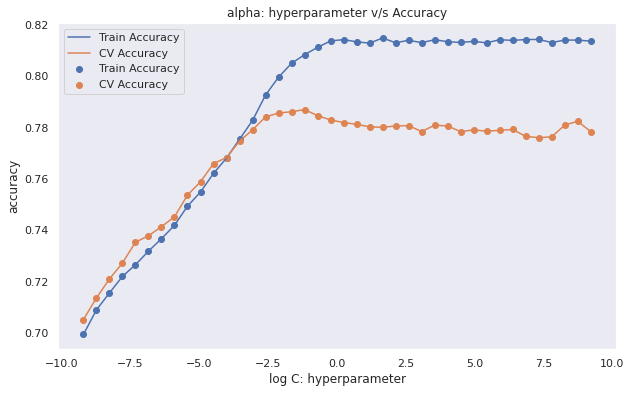

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(log_alphas, train_auc, label='Train Accuracy')
plt.plot(log_alphas, cv_auc, label='CV Accuracy')

plt.scatter(log_alphas, train_auc, label='Train Accuracy')
plt.scatter(log_alphas, cv_auc, label='CV Accuracy')

plt.legend()
plt.xlabel("log C: hyperparameter")
plt.ylabel("accuracy")
plt.title("alpha: hyperparameter v/s Accuracy")
plt.grid()
plt.show()

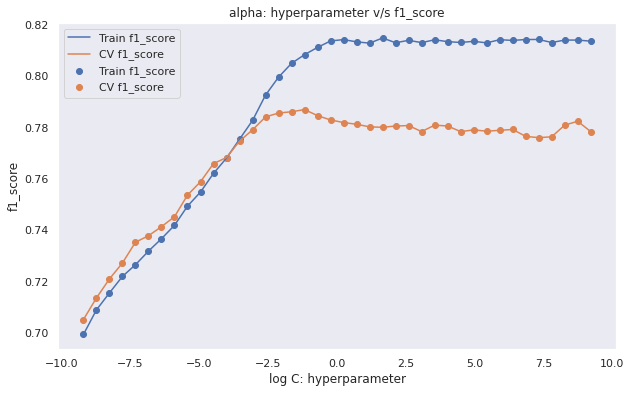

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(log_alphas, train_f1, label='Train f1_score')
plt.plot(log_alphas, cv_f1, label='CV f1_score')

plt.scatter(log_alphas, train_f1, label='Train f1_score')
plt.scatter(log_alphas, cv_f1, label='CV f1_score')

plt.legend()
plt.xlabel("log C: hyperparameter")
plt.ylabel("f1_score")
plt.title("alpha: hyperparameter v/s f1_score")
plt.grid()
plt.show()

In [ ]:
print(best_model_random.best_estimator_)

LogisticRegression(C=0.19144819761699575, multi_class='multinomial')


In [ ]:
log = LogisticRegression(C=best_c,multi_class='multinomial')

In [ ]:
log=log.fit(train1,y1_train)
from sklearn.metrics import f1_score
print('train_f1_score',f1_score(y1_train,log.predict(train1),average='micro'))
print('cv_f1_score',f1_score(y1_cv,log.predict(cv1),average='micro'))

train_f1_score 0.8050692106247662
cv_f1_score 0.7861952861952863


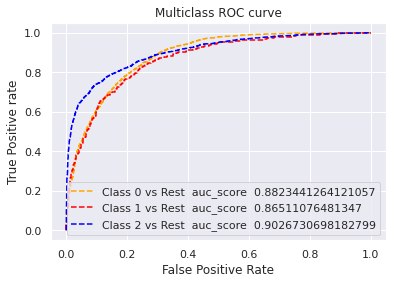

In [ ]:
#https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/
#https://machinelearningmastery.com/overfitting-machine-learning-models/
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score



# split into train/test sets
#X_train, X_test, y_train, y_test = train1,cv1,y1_train,y1_cv

# fit model
clf = OneVsRestClassifier(LogisticRegression(C=best_c,multi_class='multinomial'))
clf.fit(train1, y1_train)
pred = clf.predict(cv1)
pred_prob = clf.predict_proba(cv1)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

auc_score={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y1_cv, pred_prob[:,i], pos_label=i)
    # auc scores
    auc_score[i] = metrics.auc(fpr[i], tpr[i])
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest'+'  auc_score  '+str(auc_score[0]))
plt.plot(fpr[1], tpr[1], linestyle='--',color='red', label='Class 1 vs Rest'+'  auc_score  '+str(auc_score[1]))
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest'+'  auc_score  '+str(auc_score[2]))
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

In [ ]:
classifiers=[log,log]
trainx=[train1,cv1]
trainy=[y1_train,y1_cv]
title=['train_cm_log_reg','cv_cm_log_reg']

*********confusion matrices for cv data***********


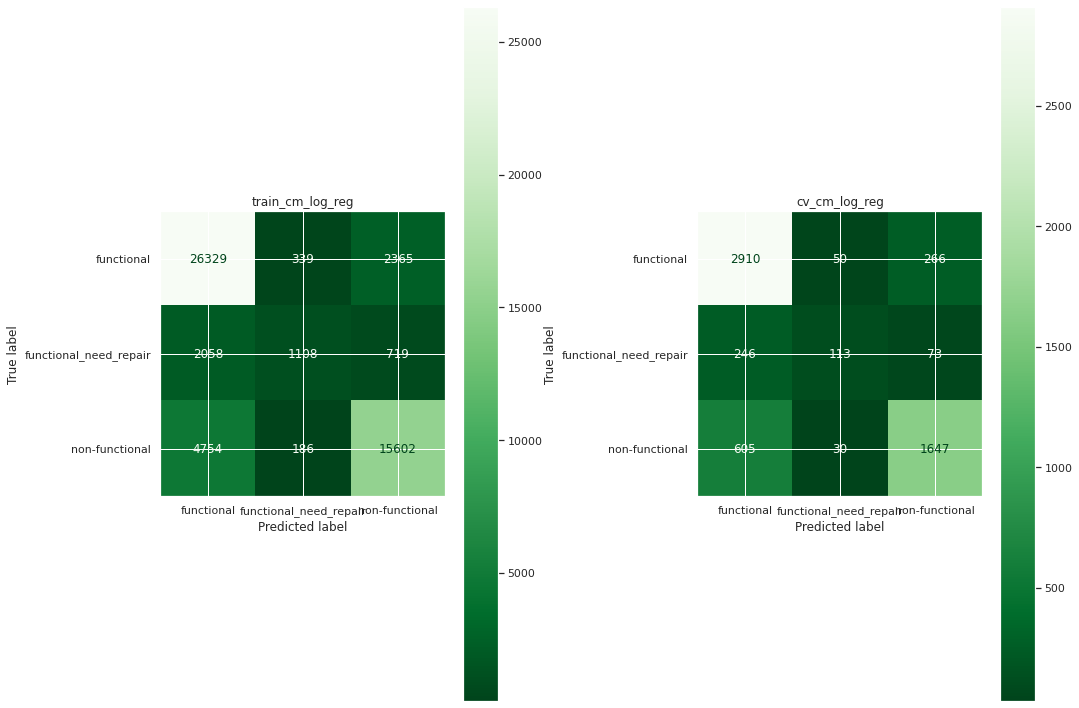

In [ ]:
#https://stackoverflow.com/questions/61016110/plot-multiple-confusion-matrices-with-plot-confusion-matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))
print('*********confusion matrices for cv data***********')
i=0
for cls, ax,cv1,y1_cv,title in zip(classifiers, axes.flatten(),trainx,trainy,title):
    
    plot_confusion_matrix(cls, 
                          cv1, 
                          y1_cv, 
                          ax=ax,
                          cmap='Greens_r',
                          display_labels=['functional','functional_need_repair','non-functional'])
    
    ax.set_title(str(title))
    #ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
#https://stackoverflow.com/questions/39662398/scikit-learn-output-metrics-classification-report-into-csv-tab-delimited-format
from sklearn.metrics import classification_report

print(classification_report(y1_cv, pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83      3226
           1       0.58      0.22      0.32       432
           2       0.84      0.71      0.77      2282

    accuracy                           0.79      5940
   macro avg       0.73      0.62      0.64      5940
weighted avg       0.78      0.79      0.77      5940



In [ ]:
from sklearn.metrics import classification_report
classificationReport = classification_report(y1_cv, pred,output_dict=True)
df4 = pd.DataFrame(classificationReport).transpose()
df4

,precision,recall,f1-score,support
0,0.767223,0.911345,0.833097,3226.000000
1,0.582822,0.219907,0.319328,432.000000
2,0.838046,0.714286,0.771233,2282.000000
accuracy,0.785354,0.785354,0.785354,0.785354
macro avg,0.729364,0.615179,0.641219,5940.000000
weighted avg,0.781021,0.785354,0.771965,5940.000000


In [ ]:
#https://stackoverflow.com/questions/28075699/coloring-cells-in-pandas
df4.style.applymap(lambda x: "background-color: red" if x>0 else "background-color: white")

,precision,recall,f1-score,support
0,0.767223,0.911345,0.833097,3226.000000
1,0.582822,0.219907,0.319328,432.000000
2,0.838046,0.714286,0.771233,2282.000000
accuracy,0.785354,0.785354,0.785354,0.785354
macro avg,0.729364,0.615179,0.641219,5940.000000
weighted avg,0.781021,0.785354,0.771965,5940.000000


###Naive bayes

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
#NB.fit(train1, y1_train)

In [ ]:
grid_params = {
'alpha' : [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000,10000,100000]}

In [ ]:
NB_rs = GridSearchCV(NB, grid_params, verbose = 1,scoring='accuracy',return_train_score=True, cv=3, n_jobs = -1)
# fit the model on our train set
NB_rs = NB_rs.fit(train1, y1_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
pd.DataFrame(NB_rs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.035947,0.008941,0.004658,0.000057,0.00001,{'alpha': 1e-05},0.672503,0.673737,0.666891,0.671044,0.002979,5,0.730191,0.732435,0.733053,0.731893,0.001230
1,0.020750,0.000692,0.004667,0.000078,0.0001,{'alpha': 0.0001},0.673850,0.674242,0.666891,0.671661,0.003377,4,0.729517,0.731481,0.732464,0.731154,0.001225
2,0.027649,0.008059,0.008457,0.005738,0.001,{'alpha': 0.001},0.674635,0.675589,0.667845,0.672690,0.003448,3,0.727553,0.729658,0.730612,0.729274,0.001278
3,0.036456,0.008042,0.006850,0.001406,0.1,{'alpha': 0.1},0.670370,0.669304,0.664141,0.667939,0.002720,6,0.711813,0.712542,0.714141,0.712832,0.000973
4,0.028731,0.015645,0.007913,0.004756,1,{'alpha': 1},0.676880,0.682716,0.672615,0.677404,0.004140,2,0.706846,0.707492,0.711897,0.708745,0.002244
5,0.024066,0.005765,0.006385,0.002930,10,{'alpha': 10},0.713300,0.715264,0.705499,0.711354,0.004217,1,0.721549,0.722587,0.721717,0.721951,0.000455
6,0.044489,0.006758,0.004298,0.000054,100,{'alpha': 100},0.652637,0.655163,0.651852,0.653217,0.001412,7,0.654517,0.651852,0.656313,0.654227,0.001833
7,0.017556,0.000554,0.005589,0.001961,1000,{'alpha': 1000},0.571212,0.571717,0.571829,0.571586,0.000268,8,0.572194,0.571633,0.571577,0.571801,0.000279
8,0.038096,0.008788,0.008415,0.005734,10000,{'alpha': 10000},0.543042,0.543154,0.543098,0.543098,0.000046,9,0.543154,0.543098,0.543098,0.543116,0.000026
9,0.037320,0.002560,0.011439,0.000190,100000,{'alpha': 100000},0.543042,0.543098,0.543098,0.543079,0.000026,10,0.543098,0.543070,0.543070,0.543079,0.000013


In [ ]:
best_alpha=NB_rs.best_params_['alpha']
print('best_alpha',best_alpha)

best_alpha 10


In [ ]:
NB_rs=MultinomialNB(alpha=best_alpha)
NB_rs.fit(train1, y1_train)

MultinomialNB(alpha=10)

In [ ]:
#https://colab.research.google.com/drive/1G_JZmgcaRRGcJyHQRm2P0frGkirkk0fI#scrollTo=tOW5wy1R9dQ6

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import math

train_auc = []
train_f1=[]

cv_f1=[]
cv_auc = []
log_alphas = []

alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]

for i in alpha:
    
    NB_rs = MultinomialNB(alpha=i)
    NB_rs.fit(train1, y1_train)

    y_train_pred = NB_rs.predict(train1)   
    y_cv_pred =NB_rs.predict(cv1)
    

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(accuracy_score(y1_train,y_train_pred))
    cv_auc.append(accuracy_score(y1_cv, y_cv_pred))

    train_f1.append(f1_score(y1_train,log.predict(train1),average='micro'))
    cv_f1.append(f1_score(y1_cv,log.predict(cv1),average='micro'))



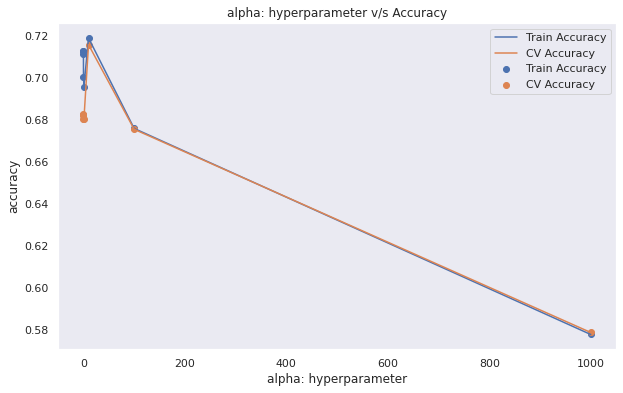

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(alpha, train_auc, label='Train Accuracy')
plt.plot(alpha, cv_auc, label='CV Accuracy')

plt.scatter(alpha, train_auc, label='Train Accuracy')
plt.scatter(alpha, cv_auc, label='CV Accuracy')

plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("accuracy")
plt.title("alpha: hyperparameter v/s Accuracy")
plt.grid()
plt.show()

both train and cv are overlapping

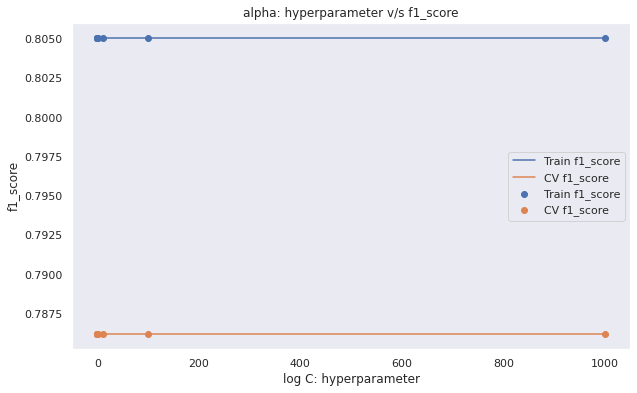

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(alpha, train_f1, label='Train f1_score')
plt.plot(alpha, cv_f1, label='CV f1_score')

plt.scatter(alpha, train_f1, label='Train f1_score')
plt.scatter(alpha, cv_f1, label='CV f1_score')

plt.legend()
plt.xlabel("log C: hyperparameter")
plt.ylabel("f1_score")
plt.title("alpha: hyperparameter v/s f1_score")
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score


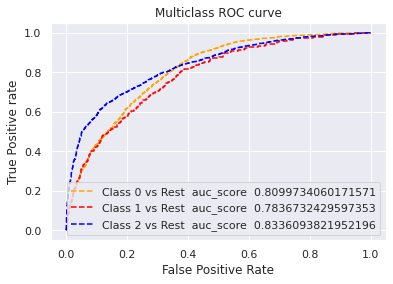

In [ ]:
#https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/
#https://machinelearningmastery.com/overfitting-machine-learning-models/
#https://stackoverflow.com/questions/45332410/roc-for-multiclass-classification
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score



# split into train/test sets
#X_train, X_test, y_train, y_test = train1,cv1,y1_train,y1_cv

# fit model
clf = OneVsRestClassifier(MultinomialNB(alpha=10))
clf.fit(train1, y1_train)
pred = clf.predict(cv1)
pred_prob = clf.predict_proba(cv1)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
auc_score={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y1_cv, pred_prob[:,i], pos_label=i)
    # auc scores
    auc_score[i] = metrics.auc(fpr[i], tpr[i])
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest'+'  auc_score  '+str(auc_score[0]))
plt.plot(fpr[1], tpr[1], linestyle='--',color='red', label='Class 1 vs Rest'+'  auc_score  '+str(auc_score[1]))
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest'+'  auc_score  '+str(auc_score[2]))
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

In [ ]:
print('train_f1_score',f1_score(y1_train,NB_rs.predict(train1),average='micro'))
print('cv_f1_score',f1_score(y1_cv,NB_rs.predict(cv1),average='micro'))

train_f1_score 0.5778338945005612
cv_f1_score 0.5787878787878787


In [ ]:
from sklearn.metrics import classification_report
classificationReport = classification_report(y1_cv, pred,output_dict=True)
df5 = pd.DataFrame(classificationReport).transpose()
df5
#https://stackoverflow.com/questions/28075699/coloring-cells-in-pandas
df5.style.applymap(lambda x: "background-color: blue" if x>0 else "background-color: white")

,precision,recall,f1-score,support
0,0.729767,0.824551,0.774269,3226.000000
1,0.575758,0.043981,0.081720,432.000000
2,0.698497,0.692375,0.695423,2282.000000
accuracy,0.717003,0.717003,0.717003,0.717003
macro avg,0.668007,0.520302,0.517137,5940.000000
weighted avg,0.706553,0.717003,0.693611,5940.000000


###Light bgm

In [ ]:
#https://www.kaggle.com/code/prashant111/lightgbm-classifier-in-python

from sklearn.metrics import f1_score
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV 
gridParams = {
    'max_depth' : [50,100,150,200,300,1000,1500],
    'random_state' : [501], 
    'estimators': [10,50,100,200,300,1000,2000]
    }

In [ ]:
lgb = lgb.LGBMClassifier()
lgb_RS=RandomizedSearchCV  (lgb, gridParams,cv=2, scoring='accuracy',verbose=1,return_train_score=True)
lgb_RS.fit(train1,y1_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2, estimator=LGBMClassifier(),
                   param_distributions={'estimators': [10, 50, 100, 200, 300,
                                                       1000, 2000],
                                        'max_depth': [50, 100, 150, 200, 300,
                                                      1000, 1500],
                                        'random_state': [501]},
                   return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
lgb_RS.best_params_

{'random_state': 501, 'max_depth': 300, 'estimators': 10}

In [ ]:
pd.DataFrame(lgb_RS.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_state,param_max_depth,param_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,2.528601,0.073339,0.347824,0.000894,501,300,10,"{'random_state': 501, 'max_depth': 300, 'estim...",0.774935,0.778002,0.776468,0.001534,1,0.796895,0.797718,0.797306,0.000412
1,2.473442,0.012483,0.340162,0.000762,501,100,1000,"{'random_state': 501, 'max_depth': 100, 'estim...",0.774935,0.778002,0.776468,0.001534,1,0.796895,0.797718,0.797306,0.000412
2,2.475131,0.011339,0.341495,0.002876,501,100,300,"{'random_state': 501, 'max_depth': 100, 'estim...",0.774935,0.778002,0.776468,0.001534,1,0.796895,0.797718,0.797306,0.000412
3,2.483938,0.002953,0.356527,0.007995,501,300,200,"{'random_state': 501, 'max_depth': 300, 'estim...",0.774935,0.778002,0.776468,0.001534,1,0.796895,0.797718,0.797306,0.000412
4,2.488127,0.011846,0.369367,0.011453,501,200,50,"{'random_state': 501, 'max_depth': 200, 'estim...",0.774935,0.778002,0.776468,0.001534,1,0.796895,0.797718,0.797306,0.000412
5,2.540348,0.010287,0.356735,0.001914,501,50,2000,"{'random_state': 501, 'max_depth': 50, 'estima...",0.774935,0.778002,0.776468,0.001534,1,0.796895,0.797718,0.797306,0.000412
6,2.529581,0.001370,0.359670,0.008221,501,300,2000,"{'random_state': 501, 'max_depth': 300, 'estim...",0.774935,0.778002,0.776468,0.001534,1,0.796895,0.797718,0.797306,0.000412
7,2.519393,0.002082,0.369758,0.000378,501,1000,2000,"{'random_state': 501, 'max_depth': 1000, 'esti...",0.774935,0.778002,0.776468,0.001534,1,0.796895,0.797718,0.797306,0.000412
8,2.534755,0.008526,0.375141,0.003515,501,1500,1000,"{'random_state': 501, 'max_depth': 1500, 'esti...",0.774935,0.778002,0.776468,0.001534,1,0.796895,0.797718,0.797306,0.000412
9,2.593244,0.012151,0.375827,0.002190,501,300,1000,"{'random_state': 501, 'max_depth': 300, 'estim...",0.774935,0.778002,0.776468,0.001534,1,0.796895,0.797718,0.797306,0.000412


In [ ]:
best_depth=lgb_RS.best_params_['max_depth']
best_estimators=lgb_RS.best_params_['estimators']
bestScore_1=lgb_RS.best_score_

In [ ]:
import lightgbm as lgb
lgb1 = lgb.LGBMClassifier(n_estimators=best_estimators,max_depth=best_depth)
#lgb1=lgb1.LGBMClassifier(n_estimators=300,max_depth=300)
lgb1.fit(train1,y1_train)

LGBMClassifier(max_depth=300, n_estimators=10)

In [ ]:
print('train f1 score',f1_score(y1_train,lgb1.predict(train1),average='micro'))
print('cv f1 scpre',f1_score(y1_cv,lgb1.predict(cv1),average='micro'))

train f1 score 0.7363075196408528
cv f1 scpre 0.73989898989899


In [ ]:
#https://colab.research.google.com/drive/1G_JZmgcaRRGcJyHQRm2P0frGkirkk0fI#scrollTo=tOW5wy1R9dQ6
from sklearn.metrics import f1_score
import lightgbm as lgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import math
import lightgbm 
from lightgbm import *

train_auc = []
train_f1=[]

cv_f1=[]
cv_auc = []
log_alphas = []

max_depth = [50,100,150,200,300,1000,1500]
estimators= [10,50,100,200,300,1000,2000]

for i,j in zip(max_depth,estimators):

    
    
    lgb2 = lgb.LGBMClassifier(n_estimators=j,max_depth=i)
    lgb2.fit(train1, y1_train)

    y_train_pred = lgb2.predict(train1)   
    y_cv_pred =lgb2.predict(cv1)
    

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(accuracy_score(y1_train,y_train_pred))
    cv_auc.append(accuracy_score(y1_cv, y_cv_pred))

    train_f1.append(f1_score(y1_train,lgb2.predict(train1),average='micro'))
    cv_f1.append(f1_score(y1_cv,lgb2.predict(cv1),average='micro'))



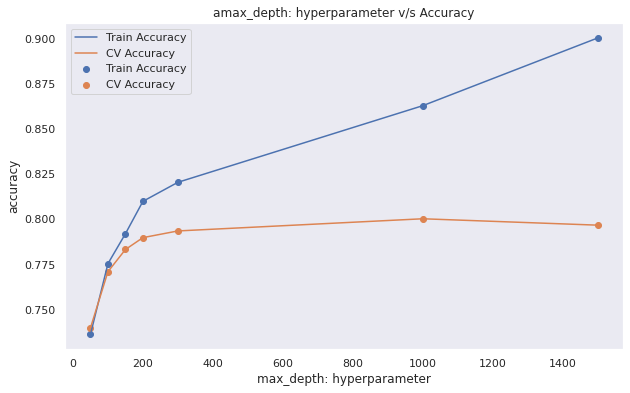

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(max_depth, train_auc, label='Train Accuracy')
plt.plot(max_depth, cv_auc, label='CV Accuracy')

plt.scatter(max_depth, train_auc, label='Train Accuracy')
plt.scatter(max_depth, cv_auc, label='CV Accuracy')

plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("accuracy")
plt.title("amax_depth: hyperparameter v/s Accuracy")
plt.grid()
plt.show()

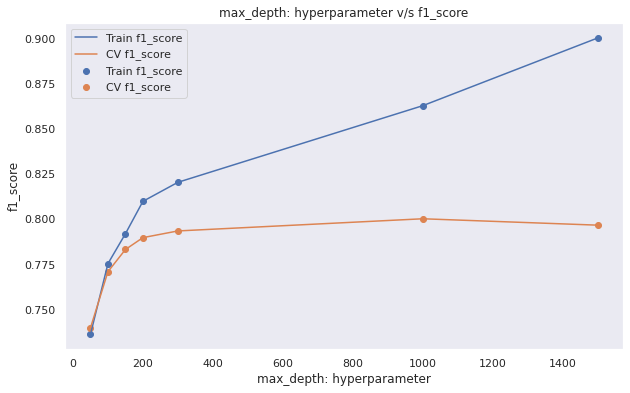

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(max_depth, train_f1, label='Train f1_score')
plt.plot(max_depth, cv_f1, label='CV f1_score')

plt.scatter(max_depth, train_f1, label='Train f1_score')
plt.scatter(max_depth, cv_f1, label='CV f1_score')

plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("f1_score")
plt.title("max_depth: hyperparameter v/s f1_score")
plt.grid()
plt.show()

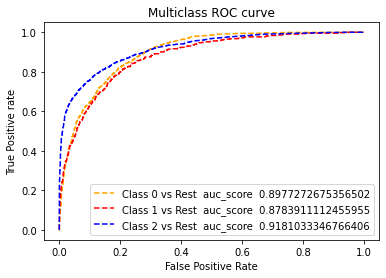

In [ ]:
#https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/
#https://machinelearningmastery.com/overfitting-machine-learning-models/
#https://stackoverflow.com/questions/45332410/roc-for-multiclass-classification
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics


# split into train/test sets
#X_train, X_test, y_train, y_test = train1,cv1,y1_train,y1_cv

# fit model


clf = OneVsRestClassifier(lgb.LGBMClassifier(n_estimators=best_estimators,max_depth=best_depth))
clf.fit(train1, y1_train)
pred = clf.predict(cv1)
pred_prob = clf.predict_proba(cv1)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
auc_score={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y1_cv, pred_prob[:,i], pos_label=i)
    # auc scores
    auc_score[i] = metrics.auc(fpr[i], tpr[i])
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest'+'  auc_score  '+str(auc_score[0]))
plt.plot(fpr[1], tpr[1], linestyle='--',color='red', label='Class 1 vs Rest'+'  auc_score  '+str(auc_score[1]))
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest'+'  auc_score  '+str(auc_score[2]))
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC lgbm',dpi=300); 

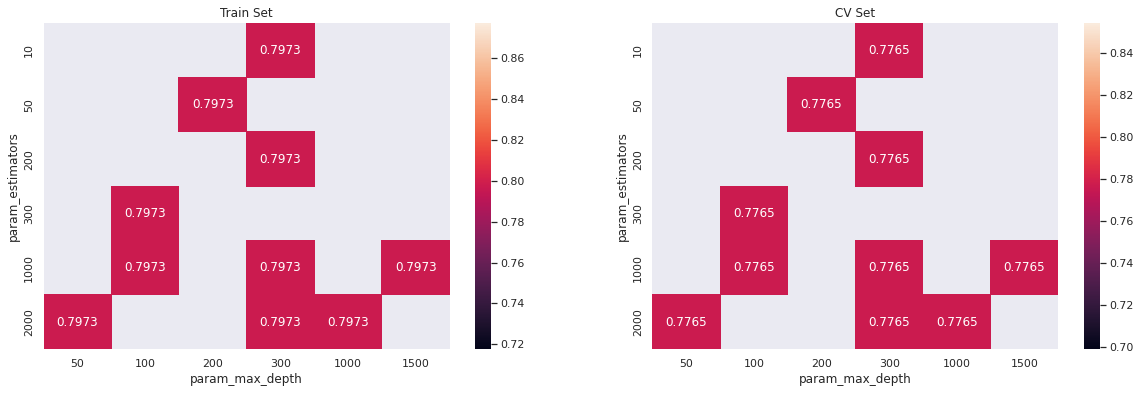

In [ ]:
import seaborn as sns; sns.set()
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
max_scores1 = pd.DataFrame(lgb_RS.cv_results_).groupby(['param_estimators', 'param_max_depth']).max().unstack()[['mean_test_score','mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [ ]:
classifiers=[clf,clf]
trainx=[train1,cv1]
trainy=[y1_train,y1_cv]
title=['train_cm_lgbm','cv_cm_lgbm']

In [ ]:
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
from sklearn.metrics import confusion_matrix
y_train_pred1=lgb1.predict(train1)
y_test_pred1=lgb1.predict(cv1)

cf_matrix_train1 = confusion_matrix(y1_train, y_train_pred1)
cf_matrix_test1 = confusion_matrix(y1_cv, y_test_pred1)
print(cf_matrix_train1,'***',cf_matrix_test1)

[[27903     2  1128]
 [ 3506    22   357]
 [ 9102     2 11438]] *** [[3104    0  122]
 [ 395    3   34]
 [ 993    1 1288]]


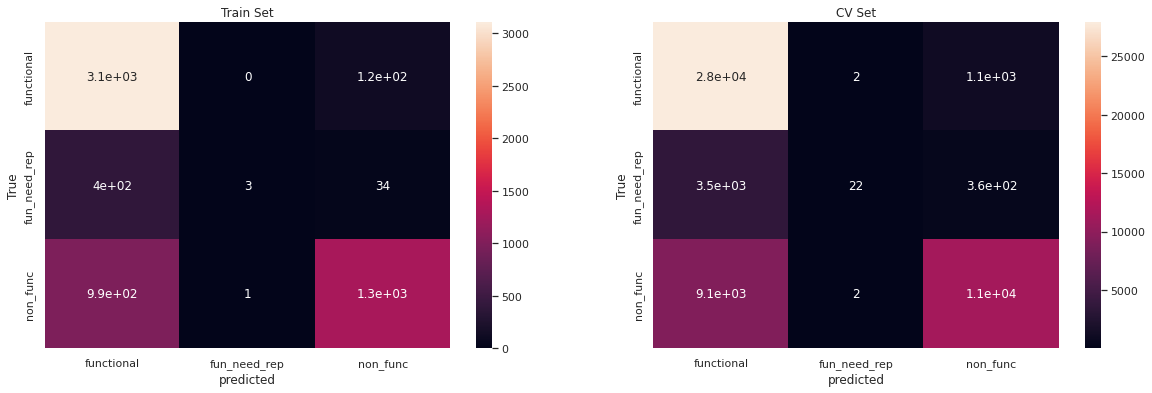

In [ ]:
#https://stackoverflow.com/questions/32723798/how-do-i-add-a-title-and-axis-labels-to-seaborn-heatmap
import seaborn as sns; sns.set()

fig, ax = plt.subplots(1,2, figsize=(20,6))
x_axis_labels = ['functional', 'fun_need_rep','non_func'] # labels for x-axis
y_axis_labels = ['functional', 'fun_need_rep','non_func'] # labels for y-axis
categories = ['functional', 'fun_need_rep','non_func']

sns.heatmap(cf_matrix_test1,xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True,ax=ax[0])
sns.heatmap(cf_matrix_train1,xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True,ax = ax[1])

ax[0].set_xlabel('predicted')
ax[0].set_ylabel('True')
ax[0].set_title('Train Set')

ax[1].set_xlabel('predicted')
ax[1].set_ylabel('True')
ax[1].set_title('CV Set')

plt.show()

In [ ]:
from sklearn.metrics import classification_report
classificationReport = classification_report(y1_cv, y_test_pred1,output_dict=True)
df5 = pd.DataFrame(classificationReport).transpose()
df5

,precision,recall,f1-score,support
0,0.691006,0.962182,0.804353,3226.000000
1,0.750000,0.006944,0.013761,432.000000
2,0.891967,0.564417,0.691358,2282.000000
accuracy,0.739899,0.739899,0.739899,0.739899
macro avg,0.777658,0.511181,0.503158,5940.000000
weighted avg,0.772501,0.739899,0.703446,5940.000000


In [ ]:
#https://stackoverflow.com/questions/28075699/coloring-cells-in-pandas
df5.style.applymap(lambda x: "background-color: blue" if x>0 else "background-color: white")

,precision,recall,f1-score,support
0,0.691006,0.962182,0.804353,3226.000000
1,0.750000,0.006944,0.013761,432.000000
2,0.891967,0.564417,0.691358,2282.000000
accuracy,0.739899,0.739899,0.739899,0.739899
macro avg,0.777658,0.511181,0.503158,5940.000000
weighted avg,0.772501,0.739899,0.703446,5940.000000


###RF model

In [ ]:
#https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial
from sklearn.model_selection import RandomizedSearchCV
gridParams = {'max_depth' : [50,100,150,200,300,500,700],
  'n_estimators' : [100,200,300,500,1000,1500]}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF = RandomizedSearchCV(RF,gridParams,verbose=1,cv=2,scoring='accuracy',return_train_score=True,n_jobs = -1,n_iter=10)
RF.fit(train1,y1_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [50, 100, 150, 200, 300,
                                                      500, 700],
                                        'n_estimators': [100, 200, 300, 500,
                                                         1000, 1500]},
                   return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
df_cv=pd.DataFrame(RF.cv_results_)

In [ ]:
df_cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,257.003398,0.566290,2.993020,0.032042,300,200,"{'n_estimators': 300, 'max_depth': 200}",0.789562,0.788552,0.789057,0.000505,4,0.999813,0.999551,0.999682,0.000131
1,108.848454,0.415853,1.753388,0.034399,200,50,"{'n_estimators': 200, 'max_depth': 50}",0.793865,0.791508,0.792686,0.001178,3,0.966779,0.966105,0.966442,0.000337
2,162.253854,2.112882,2.900913,0.256699,300,50,"{'n_estimators': 300, 'max_depth': 50}",0.793378,0.794201,0.793790,0.000412,2,0.969547,0.966704,0.968126,0.001422
3,78.084445,0.330204,1.118113,0.152548,100,100,"{'n_estimators': 100, 'max_depth': 100}",0.787804,0.790311,0.789057,0.001253,4,0.999776,0.999514,0.999645,0.000131
4,407.366147,0.033581,4.996467,0.007826,500,150,"{'n_estimators': 500, 'max_depth': 150}",0.787916,0.788964,0.788440,0.000524,10,0.999813,0.999551,0.999682,0.000131
5,247.841476,0.637732,2.994407,0.056396,300,100,"{'n_estimators': 300, 'max_depth': 100}",0.788328,0.788926,0.788627,0.000299,9,0.999813,0.999551,0.999682,0.000131
6,1231.758371,1.371355,17.865431,0.283161,1500,150,"{'n_estimators': 1500, 'max_depth': 150}",0.788365,0.789001,0.788683,0.000318,8,0.999813,0.999551,0.999682,0.000131
7,818.032224,0.010077,10.814351,0.673139,1000,100,"{'n_estimators': 1000, 'max_depth': 100}",0.789300,0.788627,0.788964,0.000337,6,0.999813,0.999551,0.999682,0.000131
8,546.726604,1.316048,12.309097,1.987898,1000,50,"{'n_estimators': 1000, 'max_depth': 50}",0.794388,0.793790,0.794089,0.000299,1,0.968949,0.968388,0.968668,0.000281
9,159.053452,1.500618,2.012033,0.432390,200,100,"{'n_estimators': 200, 'max_depth': 100}",0.788477,0.789300,0.788889,0.000412,7,0.999813,0.999514,0.999663,0.000150


In [ ]:
RF.best_params_

{'n_estimators': 1000, 'max_depth': 50}

In [ ]:
best_depth=RF.best_params_['max_depth']
best_estimators=RF.best_params_['n_estimators']
bestScore_1=RF.best_score_

In [ ]:
RF1 = RandomForestClassifier(n_estimators= best_estimators, max_depth= best_depth)
RF1.fit(train1,y1_train)

RandomForestClassifier(max_depth=50, n_estimators=1000)

In [ ]:
from sklearn import metrics

In [ ]:
#https://colab.research.google.com/drive/1G_JZmgcaRRGcJyHQRm2P0frGkirkk0fI#scrollTo=tOW5wy1R9dQ6
from sklearn.metrics import f1_score
import lightgbm as lgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import math
import lightgbm 
from lightgbm import *

train_auc = []
train_f1=[]

cv_f1=[]
cv_auc = []
log_alphas = []

max_depth = [50,100,150,200,300]
estimators= [100,200,300,1000,1100]

for i,j in zip(max_depth,estimators):

    
    
    RF = RandomForestClassifier(n_estimators=best_estimators,max_depth=best_depth)
    RF.fit(train1, y1_train)

    y_train_pred = RF.predict(train1)   
    y_cv_pred =RF.predict(cv1)
    

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(accuracy_score(y1_train,y_train_pred))
    cv_auc.append(accuracy_score(y1_cv, y_cv_pred))

    train_f1.append(f1_score(y1_train,RF.predict(train1),average='micro'))
    cv_f1.append(f1_score(y1_cv,RF.predict(cv1),average='micro'))



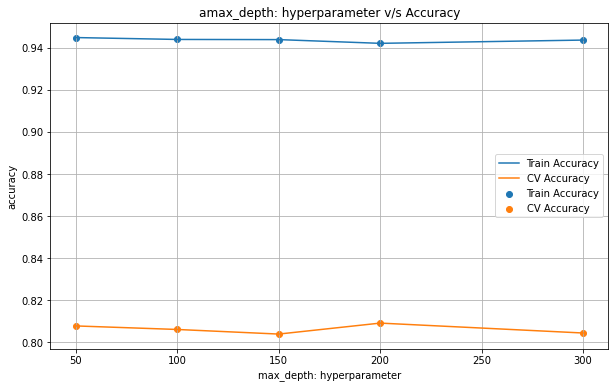

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(max_depth, train_auc, label='Train Accuracy')
plt.plot(max_depth, cv_auc, label='CV Accuracy')

plt.scatter(max_depth, train_auc, label='Train Accuracy')
plt.scatter(max_depth, cv_auc, label='CV Accuracy')

plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("accuracy")
plt.title("amax_depth: hyperparameter v/s Accuracy")
plt.grid()
plt.show()

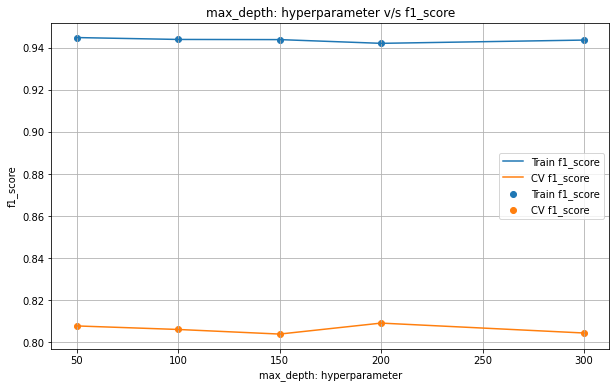

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(max_depth, train_f1, label='Train f1_score')
plt.plot(max_depth, cv_f1, label='CV f1_score')

plt.scatter(max_depth, train_f1, label='Train f1_score')
plt.scatter(max_depth, cv_f1, label='CV f1_score')

plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("f1_score")
plt.title("max_depth: hyperparameter v/s f1_score")
plt.grid()
plt.show()

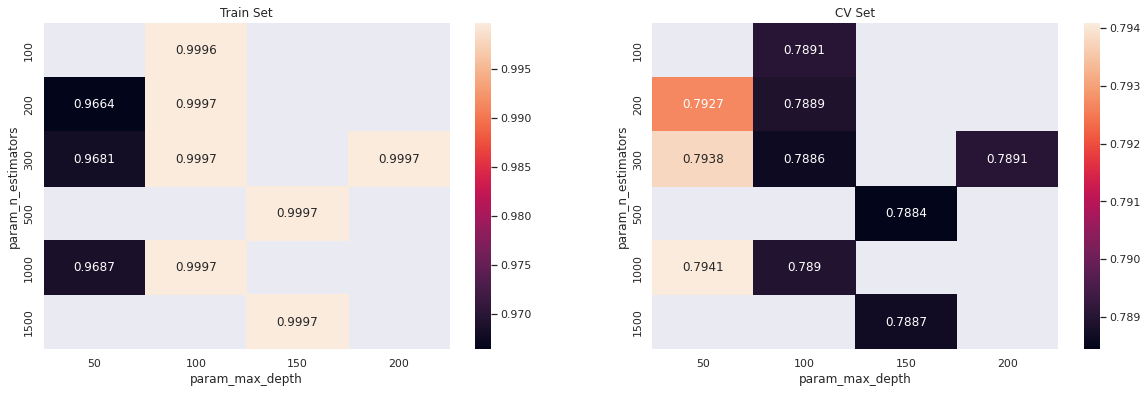

In [ ]:
import seaborn as sns; sns.set()
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
max_scores1 = df_cv.groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score','mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

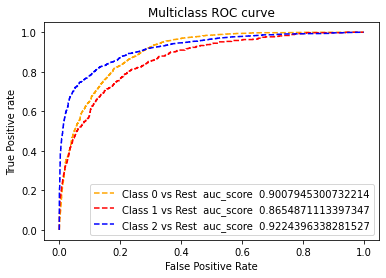

In [ ]:
#https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/
#https://machinelearningmastery.com/overfitting-machine-learning-models/
#https://stackoverflow.com/questions/45332410/roc-for-multiclass-classification
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score



# split into train/test sets
#X_train, X_test, y_train, y_test = train1,cv1,y1_train,y1_cv

# fit model


clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=best_estimators,max_depth=best_depth))
clf.fit(train1, y1_train)
pred = clf.predict(cv1)
pred_prob = clf.predict_proba(cv1)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
auc_score={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y1_cv, pred_prob[:,i], pos_label=i)
    # auc scores
    auc_score[i] = metrics.auc(fpr[i], tpr[i])
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest'+'  auc_score  '+str(auc_score[0]))
plt.plot(fpr[1], tpr[1], linestyle='--',color='red', label='Class 1 vs Rest'+'  auc_score  '+str(auc_score[1]))
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest'+'  auc_score  '+str(auc_score[2]))
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC lgbm',dpi=300); 

In [ ]:
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
from sklearn.metrics import confusion_matrix
y_train_pred1=RF1.predict(train1)
y_test_pred1=RF1.predict(cv1)

cf_matrix_train1 = confusion_matrix(y1_train, y_train_pred1)
cf_matrix_test1 = confusion_matrix(y1_cv, y_test_pred1)
print(cf_matrix_train1,'***',cf_matrix_test1)

[[28982     2    49]
 [  896  2933    56]
 [ 1357     1 19184]] *** [[3014   47  165]
 [ 263  105   64]
 [ 566   15 1701]]


In [ ]:
#https://stackoverflow.com/questions/32723798/how-do-i-add-a-title-and-axis-labels-to-seaborn-heatmap
import seaborn as sns; sns.set()

fig, ax = plt.subplots(1,2, figsize=(20,6))
x_axis_labels = ['functional', 'fun_need_rep','non_func'] # labels for x-axis
y_axis_labels = ['functional', 'fun_need_rep','non_func'] # labels for y-axis
categories = ['functional', 'fun_need_rep','non_func']

sns.heatmap(cf_matrix_test1,xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True,ax=ax[0])
sns.heatmap(cf_matrix_train1,xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True,ax = ax[1])

ax[0].set_xlabel('predicted')
ax[0].set_ylabel('True')
ax[0].set_title('Train Set')

ax[1].set_xlabel('predicted')
ax[1].set_ylabel('True')
ax[1].set_title('CV Set')

plt.show()

In [ ]:
from sklearn.metrics import classification_report
classificationReport = classification_report(y1_cv, y_test_pred1,output_dict=True)
df5 = pd.DataFrame(classificationReport).transpose()
df5

,precision,recall,f1-score,support
0,0.784283,0.934284,0.852737,3226.000000
1,0.628743,0.243056,0.350584,432.000000
2,0.881347,0.745399,0.807692,2282.000000
accuracy,0.811448,0.811448,0.811448,0.811448
macro avg,0.764791,0.640913,0.670338,5940.000000
weighted avg,0.810261,0.811448,0.798912,5940.000000


In [ ]:
#https://stackoverflow.com/questions/28075699/coloring-cells-in-pandas
df5.style.applymap(lambda x: "background-color: blue" if x>0 else "background-color: white")

,precision,recall,f1-score,support
0,0.784283,0.934284,0.852737,3226.000000
1,0.628743,0.243056,0.350584,432.000000
2,0.881347,0.745399,0.807692,2282.000000
accuracy,0.811448,0.811448,0.811448,0.811448
macro avg,0.764791,0.640913,0.670338,5940.000000
weighted avg,0.810261,0.811448,0.798912,5940.000000


In [ ]:
print('train_f1_score',f1_score(y1_train,RF1.predict(train1),average='micro'))
print('cv_f1_score',f1_score(y1_cv,RF1.predict(cv1),average='micro'))

train_f1_score 0.9558361391694725
cv_f1_score 0.8114478114478115


# Overall comparison of models

In [ ]:
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
from sklearn.metrics import confusion_matrix
y_train_pred1=log.predict(train1)
y_test_pred1=log.predict(cv1)

y_train_pred2=RF1.predict(train1)
y_test_pred2=RF1.predict(cv1)

y_train_pred3=lgb1.predict(train1)
y_test_pred3=lgb1.predict(cv1)

y_train_pred4=NB_rs.predict(train1)
y_test_pred4=NB_rs.predict(cv1)

cf_matrix_train1 = confusion_matrix(y1_train, y_train_pred1)
cf_matrix_test1 = confusion_matrix(y1_cv, y_test_pred1)

cf_matrix_train2 = confusion_matrix(y1_train, y_train_pred2)
cf_matrix_test2 = confusion_matrix(y1_cv, y_test_pred2)

cf_matrix_train3 = confusion_matrix(y1_train, y_train_pred3)
cf_matrix_test3 = confusion_matrix(y1_cv, y_test_pred3)

cf_matrix_train4 = confusion_matrix(y1_train, y_train_pred4)
cf_matrix_test4 = confusion_matrix(y1_cv, y_test_pred4)

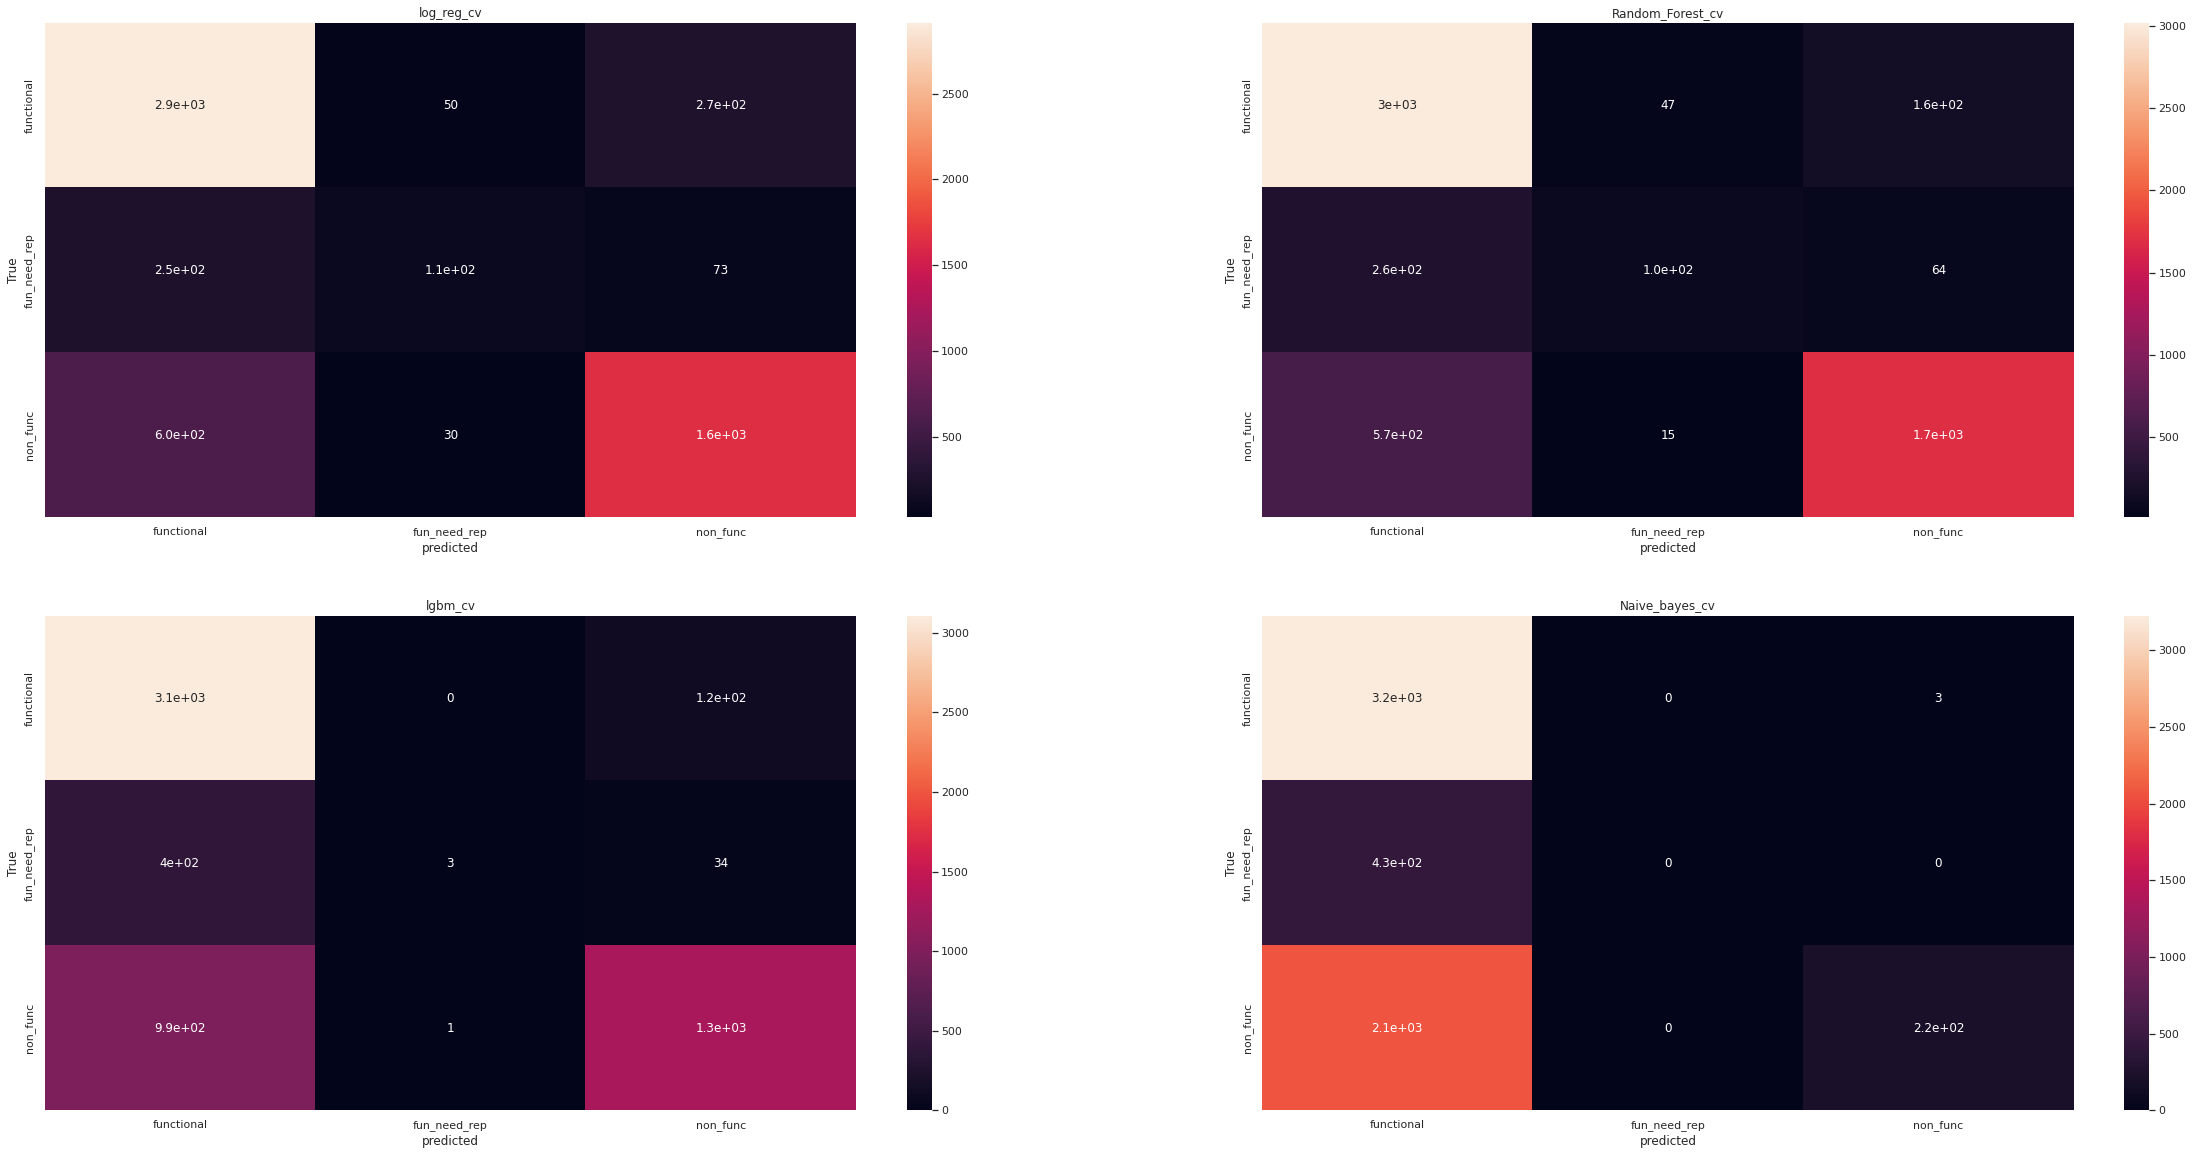

In [ ]:
#https://stackoverflow.com/questions/32723798/how-do-i-add-a-title-and-axis-labels-to-seaborn-heatmap
import seaborn as sns; sns.set()

fig, ax = plt.subplots(2,2, figsize=(40,20))
x_axis_labels = ['functional', 'fun_need_rep','non_func'] # labels for x-axis
y_axis_labels = ['functional', 'fun_need_rep','non_func'] # labels for y-axis
categories = ['functional', 'fun_need_rep','non_func']

sns.heatmap(cf_matrix_test1,xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True,ax=ax[0][0])
sns.heatmap(cf_matrix_test2,xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True,ax = ax[0][1])
sns.heatmap(cf_matrix_test3,xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True,ax=ax[1][0])
sns.heatmap(cf_matrix_test4,xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True,ax = ax[1][1])



ax[0][0].set_xlabel('predicted')
ax[0][0].set_ylabel('True')
ax[0][0].set_title('log_reg_cv')

ax[0][1].set_xlabel('predicted')
ax[0][1].set_ylabel('True')
ax[0][1].set_title('Random_Forest_cv')

ax[1][0].set_xlabel('predicted')
ax[1][0].set_ylabel('True')
ax[1][0].set_title('lgbm_cv')

ax[1][1].set_xlabel('predicted')
ax[1][1].set_ylabel('True')
ax[1][1].set_title('Naive_bayes_cv')


plt.show()

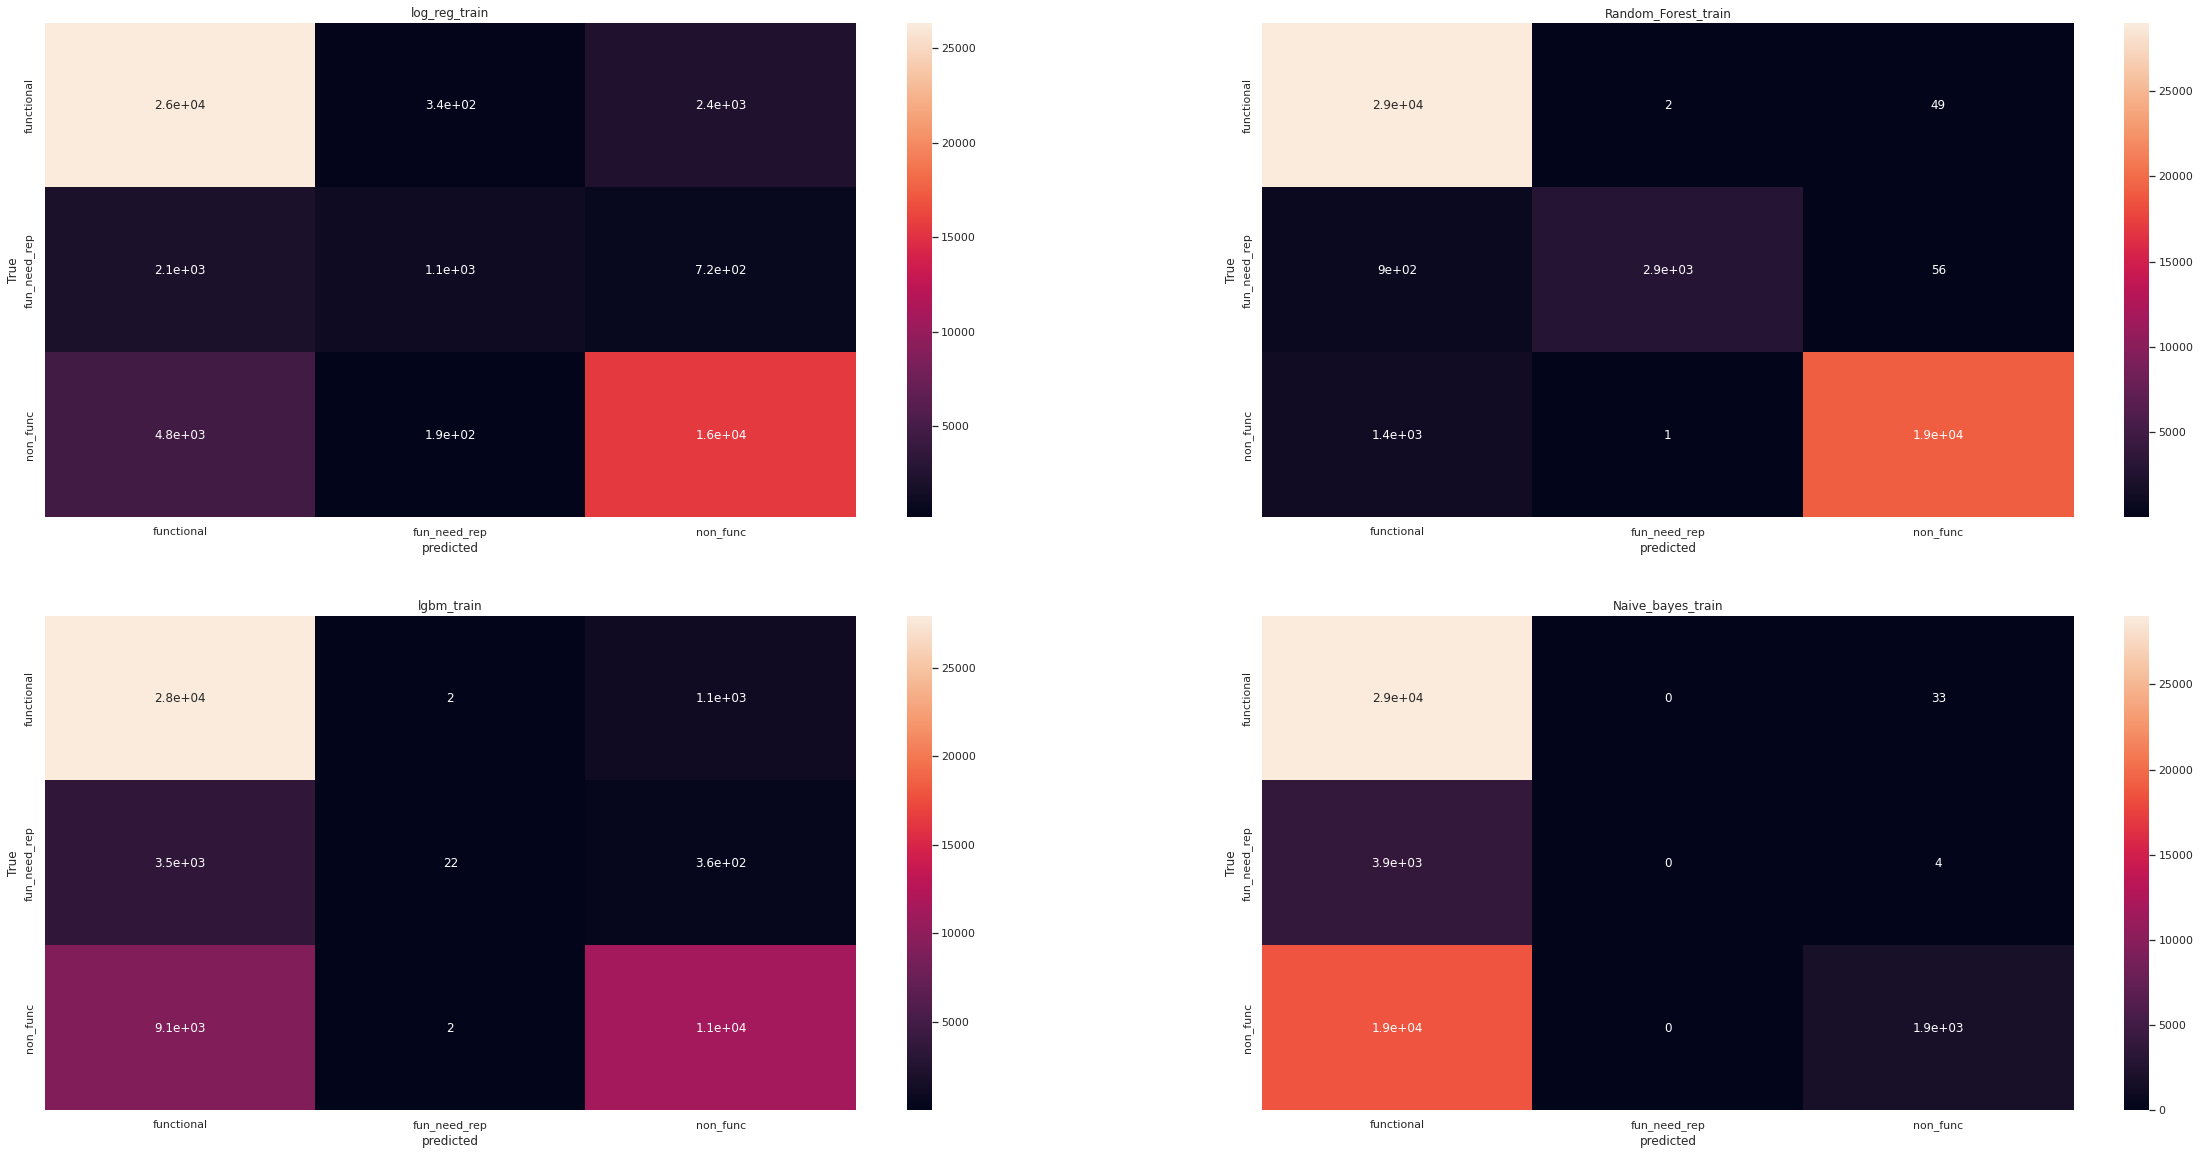

In [ ]:
#https://stackoverflow.com/questions/32723798/how-do-i-add-a-title-and-axis-labels-to-seaborn-heatmap
import seaborn as sns; sns.set()

fig, ax = plt.subplots(2,2, figsize=(40,20))
x_axis_labels = ['functional', 'fun_need_rep','non_func'] # labels for x-axis
y_axis_labels = ['functional', 'fun_need_rep','non_func'] # labels for y-axis
categories = ['functional', 'fun_need_rep','non_func']

sns.heatmap(cf_matrix_train1,xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True,ax=ax[0][0])
sns.heatmap(cf_matrix_train2,xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True,ax = ax[0][1])
sns.heatmap(cf_matrix_train3,xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True,ax=ax[1][0])
sns.heatmap(cf_matrix_train4,xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True,ax = ax[1][1])



ax[0][0].set_xlabel('predicted')
ax[0][0].set_ylabel('True')
ax[0][0].set_title('log_reg_train')

ax[0][1].set_xlabel('predicted')
ax[0][1].set_ylabel('True')
ax[0][1].set_title('Random_Forest_train')

ax[1][0].set_xlabel('predicted')
ax[1][0].set_ylabel('True')
ax[1][0].set_title('lgbm_train')

ax[1][1].set_xlabel('predicted')
ax[1][1].set_ylabel('True')
ax[1][1].set_title('Naive_bayes_train')


plt.show()

# Interpretations

## Overall comparison of models

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix



In [ ]:
classifiers=[log,RF,lgb1,NB_rs]

*********confusion matrices for cv data***********


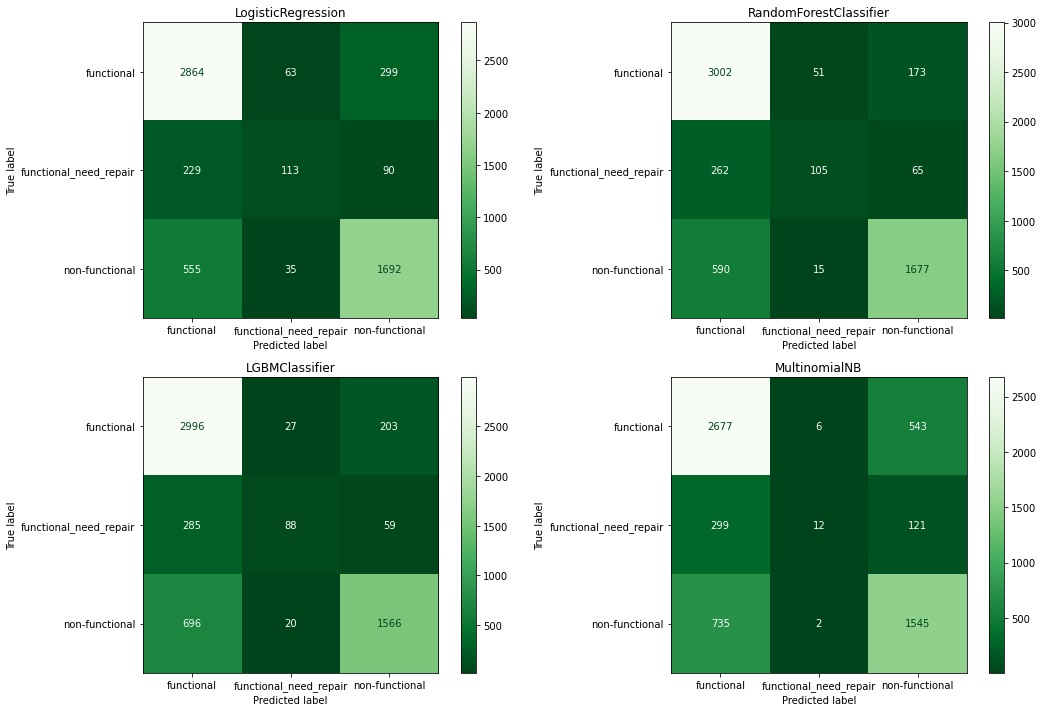

In [ ]:
#https://stackoverflow.com/questions/61016110/plot-multiple-confusion-matrices-with-plot-confusion-matrix
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
print('*********confusion matrices for cv data***********')
for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, 
                          cv1, 
                          y1_cv, 
                          ax=ax,
                          cmap='Greens_r',
                          display_labels=['functional','functional_need_repair','non-functional'])
    
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()

*********confusion matrices for train data***********


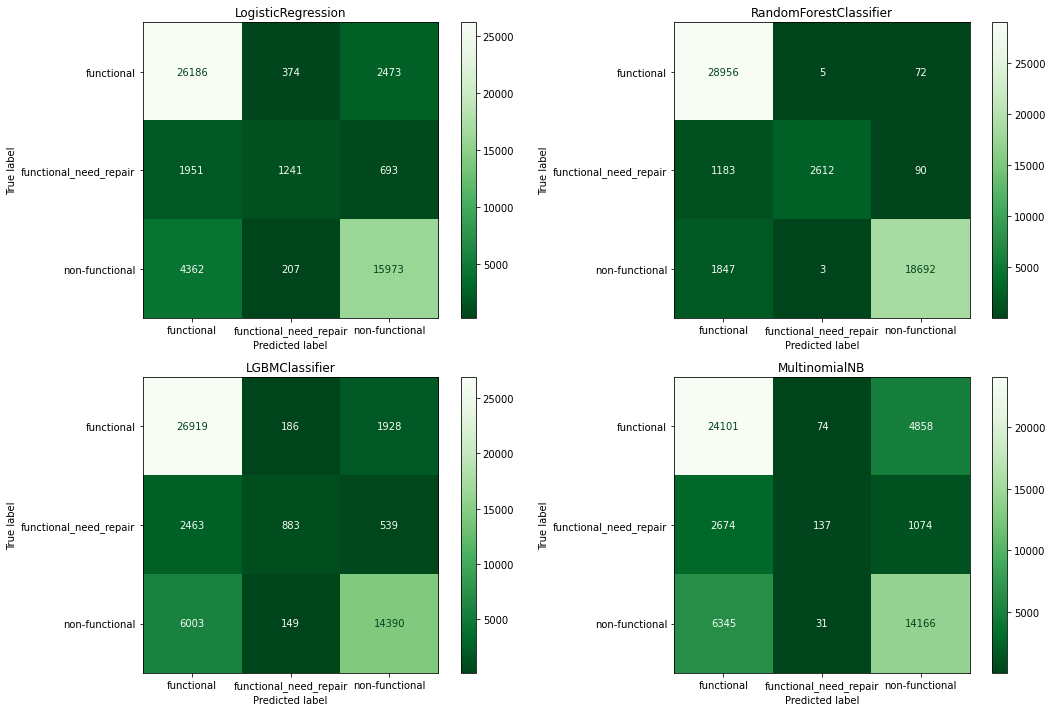

In [ ]:
#https://stackoverflow.com/questions/61016110/plot-multiple-confusion-matrices-with-plot-confusion-matrix
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
print('*********confusion matrices for train data***********')
for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, 
                          train1, 
                          y1_train, 
                          ax=ax,
                          cmap='Greens_r',
                          display_labels=['functional','functional_need_repair','non-functional'])
    
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()

## From confusion matrices

1)missclassification rate of minority class(functional_need_repair) was low in logistic regression which have correctly classified points in % wise is 31%

2)RF forest have next highest correctly classified points 29% which was a slight difference,this is due to the model might to be slightly overfitted

3)naives bayes have highest misclassification rate(96.7%),this due to models might be  underfitted

4)Both logistic regression and random forest have not much difference in prediction of correctly classified points, in fact if model performance does not matter for a slight drop compared with RF model then it would be a better choice to choose best base model then it would be a logistic regression

## Pretty Table

In [5]:
#https://www.javatpoint.com/prettytable-in-python
from prettytable import PrettyTable  
  
# Creating a new table   
newTable = PrettyTable(["Model",  "CV F1_score with PCA","CV F1_score without PCA"])  
  
# Add rows  
newTable.add_row(["logistic regression", "0.7853", "0.8651"])  
newTable.add_row(["Naive Bayes", "0.5430", "0.5787"])  
newTable.add_row(["Random Forest", "0.8074", "0.8114"])  
newTable.add_row(["LightBGM", " 0.7715", "0.7398"])  

In [6]:
print(newTable)

+---------------------+----------------------+-------------------------+
|        Model        | CV F1_score with PCA | CV F1_score without PCA |
+---------------------+----------------------+-------------------------+
| logistic regression |        0.7853        |          0.7861         |
|     Naive Bayes     |        0.5430        |          0.5787         |
|    Random Forest    |        0.7715        |          0.8114         |
|       LightBGM      |        0.8074        |          0.7398         |
+---------------------+----------------------+-------------------------+


From F_1 scores

1)out of all models Random Forest have the high F1 score but it takes a lot of time to execute the model due to higher dimensionality.

2)Base line models like Logistic regression works well on higher dimensional data and the there is no big difference between base line model and Random Forest.

3)Naive Bayes works Fine on Higher dimensional data but the model was underfitted

4)Light Bgm also works well on CV Data But on test data when compare to the Random Forest The F1 score and the accuracy of the models were dropped

4)In the competition they provide ranks on best scores hence Best model will be the Random Forest having cv score of 0.0.8114

6)model performance was improved when number of estimators range increased from 500 to 2000 with best estimators are 'n_estimators': 1000, 'max_depth': 50

5)There is a slight improvement in model performance if pca was not employed along with other features compared withpca in model building

##AUC_ROC with PCA/without PCA curves interpretation

In [13]:
#https://www.javatpoint.com/prettytable-in-python
from prettytable import PrettyTable  
  
# Creating a new table   
newTable = PrettyTable(["Model",  "class1 vs rest auc score with PCA","class1 vs rest auc score without  PCA"])  
  
# Add rows  
newTable.add_row(["logistic regression", "0.8651", "0.8651"])  
newTable.add_row(["Naive Bayes", "0.7835", "0.7836"])  
newTable.add_row(["Random Forest", "0.8640", "0.8654"])  
newTable.add_row(["LightBGM", "0.8665", "0.8783"])  

In [14]:
print(newTable)

+---------------------+-----------------------------------+---------------------------------------+
|        Model        | class1 vs rest auc score with PCA | class1 vs rest auc score without  PCA |
+---------------------+-----------------------------------+---------------------------------------+
| logistic regression |               0.8651              |                 0.8651                |
|     Naive Bayes     |               0.7835              |                 0.7836                |
|    Random Forest    |               0.8640              |                 0.8654                |
|       LightBGM      |               0.8665              |                 0.8783                |
+---------------------+-----------------------------------+---------------------------------------+


1)From ROC auc scores logistic regression was performed well on minority class whenc compared with best model i.e random forest,but overall performance if you noticed then random forest model was scored high without pca when compared with PCA.

2)Hence from above interpretations if PCA included then model performance slightly dropped when compared without PCA.

From above all interpretations best model will be considered as Random forest model(without PCA) scored 0.8114 comapred with pca since there may be loss of information if we include pca